In [1]:
import pandas as pd
import numpy as np

pd.__version__

'2.2.3'

# Часть 2 - Структуры данных

## Series, DataFrame, Index

### Series

#### Конструктор

https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas-series

```python
Series(data=None, index=None, dtype=None, name=None, copy=None, fastpath=<no_default>)
```

In [9]:
pd.Series(1)

0    1
dtype: int64

In [8]:
pd.Series().index

RangeIndex(start=0, stop=0, step=1)

In [13]:
pd.Series(index=[1, 2, 3])

Series([], dtype: object)

In [18]:
pd.Series(index=pd.RangeIndex(1, 11, 1), dtype='float')

1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
dtype: float64

#### Атрибуты

https://pandas.pydata.org/docs/reference/series.html#attributes

- index
- array
- values
- dtype
- shape
- ndim
- size
- T
- memory_usage
- empty
- dtypes
- name

- at
- iat
- loc
- iloc
- axes
- is_monotonic_decreasing
- is_monotonic_increasing
- is_unique

In [26]:
ser2 = pd.Series(
    {'a': 1, 'b': 2}
)
ser2

a    1
b    2
dtype: int64

In [27]:
ser2.index

Index(['a', 'b'], dtype='object')

In [30]:
ser3 = pd.Series(
    {1: 1.5, 2: 2.5}
)
ser3.index, ser3

(Index([1, 2], dtype='int64'),
 1    1.5
 2    2.5
 dtype: float64)

In [33]:
pd.Series(['1', [2, 4], 3]).array

<PandasArray>
['1', [2, 4], 3]
Length: 3, dtype: object

In [34]:
ser3.values

array([1.5, 2.5])

In [37]:
ser3.dtype, ser3.dtypes

(dtype('float64'), dtype('float64'))

In [39]:
pd.Series(['1', [2, 4], 3]).dtypes

dtype('O')

In [44]:
ser3.shape

(2,)

In [45]:
ser3.size

2

In [46]:
ser3.T

1    1.5
2    2.5
dtype: float64

In [54]:
ser3.memory_usage()  # Ранее это был атрибут

32

In [55]:
ser3.empty

False

In [57]:
ser3.size

2

In [56]:
pd.Series().empty

True

In [58]:
pd.Series().size

0

In [61]:
pd.Series(index=[1, 2]).empty

1   NaN
2   NaN
dtype: float64

In [62]:
pd.Series(index=[1, 2]).size

2

In [5]:
ser4 = pd.Series(
    {'a': 1, 'b': 2}
)
ser4.axes

[Index(['a', 'b'], dtype='object')]

#### Задание 2.001

- Создать максимально разными способами несколько сериий
- Определить что серия пустая
- Сравнить длину двух любых серий

#### Преобразования

- .astype()
- .convert_dtypes()
- .infer_objects()
- .copy()
- .bool()
- .to_numpy()
- .to_period()
- .to_timestanp()
- .to_list()
- .\__array\__()

##### Series.astype()

```python
Series.astype(dtype, copy=None, errors='raise')
```

In [7]:
df5 = pd.DataFrame(
    {'a': [1, 2], 'b': [2, 3]}
)
df5.dtypes

a    int64
b    int64
dtype: object

In [8]:
df5.astype('int32').dtypes

a    int32
b    int32
dtype: object

In [9]:
df5.astype({'b': 'int32'}).dtypes

a    int64
b    int32
dtype: object

In [10]:
ser5 = pd.Series([1, 2, 3], dtype='int32')
ser5

0    1
1    2
2    3
dtype: int32

In [11]:
ser5.astype('category')

0    1
1    2
2    3
dtype: category
Categories (3, int32): [1, 2, 3]

In [12]:
from pandas.api.types import CategoricalDtype

cat_dtype = CategoricalDtype(
    categories=[3, 2], ordered=True
)

ser5.astype(cat_dtype)

0    NaN
1      2
2      3
dtype: category
Categories (2, int64): [3 < 2]

In [15]:
serdate = pd.Series(pd.date_range('20200101', periods=3))
serdate

0   2020-01-01
1   2020-01-02
2   2020-01-03
dtype: datetime64[ns]

##### Series.convert_dtypes()

```python
Series.convert_dtypes(
    infer_objects=True, 
    convert_string=True, 
    convert_integer=True, 
    convert_boolean=True, 
    convert_floating=True, 
    dtype_backend='numpy_nullable'
)
```

In [17]:
df6 = pd.DataFrame(
    {
        "a": pd.Series([1, 2, 3], dtype=np.dtype("int32")),
        "b": pd.Series(["x", "y", "z"], dtype=np.dtype("O")),
        "c": pd.Series([True, False, np.nan], dtype=np.dtype("O")),
        "d": pd.Series(["h", "i", np.nan], dtype=np.dtype("O")),
        "e": pd.Series([10, np.nan, 20], dtype=np.dtype("float")),
        "f": pd.Series([np.nan, 100.5, 200], dtype=np.dtype("float")),
    }
)
df6

,a,b,c,d,e,f
0,1,x,True,h,10.0,NaN
1,2,y,False,i,NaN,100.5
2,3,z,NaN,NaN,20.0,200.0


In [18]:
df6.dtypes

a      int32
b     object
c     object
d     object
e    float64
f    float64
dtype: object

In [19]:
dfn = df.convert_dtypes()
dfn

,a,b,c,d,e,f
0,1,x,True,h,10,<NA>
1,2,y,False,i,<NA>,100.5
2,3,z,<NA>,<NA>,20,200.0


In [20]:
dfn.dtypes

a             Int32
b    string[python]
c           boolean
d    string[python]
e             Int64
f           Float64
dtype: object

In [21]:
ser6 = pd.Series(['a', 'b', np.nan])
ser6

0      a
1      b
2    NaN
dtype: object

In [22]:
ser6.convert_dtypes()

0       a
1       b
2    <NA>
dtype: string

##### Series.infer_objects()

```python
Series.infer_objects(copy=None)
```

In [29]:
df7 = pd.DataFrame({'A': ['a', 1, 2, 3]})
df7

,A
0,a
1,1
2,2
3,3


In [30]:
df7 = df7.iloc[1:]
df7

,A
1,1
2,2
3,3


In [33]:
df7.dtypes

A    object
dtype: object

In [34]:
df7.infer_objects().dtypes

A    int64
dtype: object

##### Series.copy()

In [35]:
ser7 = ser6.copy()  # pd.Series(ser6)
ser7

0      a
1      b
2    NaN
dtype: object

##### Series.bool()

In [44]:
pd.Series([True]).bool(), pd.Series([False]).bool()

(True, False)

In [50]:
df8 = pd.DataFrame({'col': [True]})
df8

,col
0,True


In [52]:
df8.bool()

True

##### Задание 2.002

- .astype()
- .convert_dtypes()
- .infer_objects()
- .copy()
- .bool()

- Из датасета "data/part2/cat_food_orders.csv" создать серии из каждого столбца. Преобразовать серии с типом данных float64 - float32; int64 - int32. Преобразование выполнить несколькими способами:
    - вручную
    - автоматически

- Добавить в серию "wholesale_price" элемент типа "строка". Поисследовать возможность добавления такого элемента и преобразование типа данных серии вместе с этим элементом и без него (удалив его).

##### Series.to_numpy()

```python
Series.to_numpy(dtype=None, copy=False, na_value=<no_default>, **kwargs)
```

In [4]:
ser = pd.Series(pd.Categorical(['a', 'b', 'a']))
ser

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [5]:
ser.to_numpy()

array(['a', 'b', 'a'], dtype=object)

In [8]:
ser = pd.Series(pd.date_range('2000', periods=2, tz='CET'))
ser

0   2000-01-01 00:00:00+01:00
1   2000-01-02 00:00:00+01:00
dtype: datetime64[ns, CET]

In [10]:
ser.to_numpy('datetime64[ns]')

array(['1999-12-31T23:00:00.000000000', '2000-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')

##### Series.to_period()

```python
Series.to_period(freq=None, copy=None)
```

In [12]:
idx = pd.DatetimeIndex(['2023', '2024', '2025'])
idx

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', freq=None)

In [22]:
s = pd.Series([1, 2, 3], index=idx)
s

2023-01-01    1
2024-01-01    2
2025-01-01    3
dtype: int64

In [23]:
s.index

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', freq=None)

In [24]:
s = s.to_period()
s

2023    1
2024    2
2025    3
Freq: A-DEC, dtype: int64

In [25]:
s.index

PeriodIndex(['2023', '2024', '2025'], dtype='period[A-DEC]')

##### Series.to_timestamp()

```python
Series.to_timestamp(freq=None, how='start', copy=None)
```

how: {'s', 'e', 'start', 'end'}

In [30]:
idx = pd.PeriodIndex(['2023', '2024', '2025'], freq='Y')
idx

PeriodIndex(['2023', '2024', '2025'], dtype='period[A-DEC]')

In [31]:
ser = pd.Series([1, 2, 3], idx)
ser

2023    1
2024    2
2025    3
Freq: A-DEC, dtype: int64

In [ ]:
ser = ser.to_timestamp()
ser

2023-01-01    1
2024-01-01    2
2025-01-01    3
Freq: AS-JAN, dtype: int64

In [34]:
ser2 = pd.Series([1, 2, 3], index=idx)
ser2

2023    1
2024    2
2025    3
Freq: A-DEC, dtype: int64

In [35]:
ser2 = ser2.to_timestamp(freq='M')
ser2

2023-01-31    1
2024-01-31    2
2025-01-31    3
Freq: A-JAN, dtype: int64

##### Series.to_list()

In [36]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [37]:
s.to_list()

[1, 2, 3]

In [38]:
list(s)

[1, 2, 3]

#### Индексация и итерация

- .get()
- .at
- .iat
- .loc
- .iloc
- .\__iter__()
- .items()
- .item()
- .keys()
- .pop()
- .xs()

##### Series.get()

```python
Series.get(key, default=None)
```

In [40]:
df = pd.DataFrame(
    [
        [24.3, 75.7, 'high'],
        [31, 87.8, 'high'],
        [22, 71.6, 'medium'],
        [35, 95, 'medium'],
    ],
    columns=['temp_celc', 'temp_faren', 'windspeed'],
    index=pd.date_range(start='2014-02-12', end='2014-02-15', freq='D')
)
df

,temp_celc,temp_faren,windspeed
2014-02-12,24.3,75.7,high
2014-02-13,31.0,87.8,high
2014-02-14,22.0,71.6,medium
2014-02-15,35.0,95.0,medium


In [44]:
df.get(['temp_celc', 'windspeed'])

,temp_celc,windspeed
2014-02-12,24.3,high
2014-02-13,31.0,high
2014-02-14,22.0,medium
2014-02-15,35.0,medium


In [45]:
df.get(['windspeed'])

,windspeed
2014-02-12,high
2014-02-13,high
2014-02-14,medium
2014-02-15,medium


In [51]:
df.get(['wind'], default='...')

'...'

##### Series.at

```python
Series.at[index]
DataFrame.at[row, column]
```

In [52]:
df = pd.DataFrame(
    [
        [0, 2, 3],
        [0, 4, 1],
        [10, 20, 30],
    ],
    index=[4, 5, 6],
    columns=['A', 'B', 'C']
)
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [53]:
df.at[4, 'B']

2

In [55]:
df.at[4, 'B'] = 111
df

,A,B,C
4,0,111,3
5,0,4,1
6,10,20,30


In [58]:
df.B, df.B.at[5]

(4    111
 5      4
 6     20
 Name: B, dtype: int64,
 4)

##### Series.iat

```python
Series.iat[index]
DateFrame.iat[row_id, column_id]
```

In [59]:
df = pd.DataFrame(
    [
        [0, 2, 3],
        [0, 4, 1],
        [10, 20, 30],
    ],
    index=[4, 5, 6],
    columns=['A', 'B', 'C']
)
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [60]:
df.iat[2, 2]

30

In [62]:
df.iat[2, 2] = 333
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,333


In [63]:
df.C.iat[2]

333

##### Подробнее про атрибуты и срезы/индексы аттрибутов

In [64]:
df = pd.DataFrame(
    [
        [0, 2, 3],
        [0, 4, 1],
        [10, 20, 30],
    ],
    index=[4, 5, 6],
    columns=['A', 'B', 'C']
)
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [76]:
df.T

,4,5,6
A,0,0,10
B,2,4,20
C,3,1,30


In [68]:
class my_class:
    def __init__(self, a, b):
        self.a = a
        self.b = b

my_object = my_class(1, 3)
my_object.a = 2
my_object.a

2

##### Задание 2.003

Дана серия данных о температуре в течение недели. Необходимо преобразовать эту серию в массив numpy и выполнить следующие операции с этим массивом:
- Найдите максимальную температуру
- Найдите минимальную температуру
- Вычислите среднюю температуру за неделю

```python
temperatures = pd.Series(
    [22, 24, 19, 23, 21, 25, 20], 
    index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)
```

##### Задание 2.004

Создайте серию данных, исходный вид которой показан ниже. Серия представляет количество проданных товаров по дням. 

Необходимо преобразовать эту серию в периоды (недели) и вывести общее количество продаж за каждую неделю.

Исходный вид серии:

```txt
2024-01-01     30
2024-01-02     25
2024-01-03     50
2024-01-04     45
2024-01-05     60
2024-01-06     75
2024-01-07     90
2024-01-08     55
2024-01-09     35
2024-01-10     40
2024-01-11     65
2024-01-12     70
2024-01-13     20
2024-01-14     85
2024-01-15     95
2024-01-16     80
2024-01-17    100
2024-01-18    110
2024-01-19     55
2024-01-20     35
Freq: D, dtype: int64
```

##### Задание 2.005

Создайте серию данных, исходный вид которой показан ниже. Серия представляет количество проданных товаров по месяцам. 

Необходимо преобразовать эту серию в временные метки (timestamp) и выполнить следующие операции:
- Выведите общие продажи за весь период.
- Выведите продажи за один любой месяц.

Исходный вид серии:

```txt
2024-01    500
2024-02    600
2024-03    450
2024-04    700
2024-05    800
Freq: M, dtype: int64
```

##### Задание 2.006

Создайте серию данных с оценками студентов, исходный вид которой показан ниже. 

Необходимо преобразовать эту серию в список и выполнить следующие операции:
- Найдите максимальную оценку.
- Найдите минимальную оценку.
- Вычислите среднюю оценку.
- Добавьте новую оценку в список.

Исходный вид серии:

```txt
Alice      85
Bob        90
Charlie    78
David      92
Eva        88
dtype: int64
```

##### Задание 2.007

Создайте серию данных с оценками студентов, исходный вид которой показан ниже. 

Необходимо:
- извлечь оценки для определенных студентов, используя метод get()
- обработать случаи, когда оценка отсутствует (например, 0, для студента Frank).

Исходный вид серии:

```txt
Alice      8.5
Bob        9.0
Charlie    7.8
David      9.2
Eva        8.8
dtype: float64
```

##### Задание 2.008

Ниже дана серия данных с оценками студентов. 

Необходимо использовать **Series.at** для доступа к оценкам отдельных студентов и изменения их значений.

Выполните следующие операции:
- Извлеките оценку Alice.
- Измените оценку Bob на 95.
- Извлеките изменённую оценку Bob.
- Добавьте оценку для нового студента Frank с помощью at.

```python
grades = pd.Series({'Alice': 85, 'Bob': 90, 'Charlie': 78, 'David': 92, 'Eva': 88})
```

##### Задание 2.009

Ниже дана серия данных с оценками студентов. 

Необходимо использовать метод **Series.iat** для доступа к оценкам **по их позиции** и изменения значений.

Выполните следующие операции:
- Извлеките оценку третьего студента (Charlie).
- Измените оценку второго студента (Bob) на 95.
- Извлеките изменённую оценку второго студента (Bob).
- Добавьте оценку для нового студента Frank в конец списка (например, 80) и подтвердите, что позиция учитывает порядок.

```python
grades = pd.Series([85, 90, 78, 92, 88], index=['Alice', 'Bob', 'Charlie', 'David', 'Eva'])
```

##### Series.loc

Варианты входных параметров:
- 4, 'a'
- ['a', 'b', 'c']
- 'a':'z'
- bool массив
- вызываемые функции

In [4]:
df = pd.DataFrame(
    [
        [1, 2],
        [4, 5],
        [7, 8]
    ],
    index=['кобра', 'кабанчик', 'медведь'],
    columns=['макс скорость', 'сила']
)
df

,макс скорость,сила
кобра,1,2
кабанчик,4,5
медведь,7,8


In [5]:
df.loc['кабанчик']

макс скорость    4
сила             5
Name: кабанчик, dtype: int64

In [ ]:
df.loc[['кабанчик', 'медведь']]

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [8]:
df.loc['кабанчик', 'сила']

5

In [10]:
df.loc['кабанчик':'медведь', 'макс скорость']

кабанчик    4
медведь     7
Name: макс скорость, dtype: int64

In [11]:
df.loc[[False, False, True]]

,макс скорость,сила
медведь,7,8


In [12]:
df['сила'] > 3

кобра       False
кабанчик     True
медведь      True
Name: сила, dtype: bool

In [13]:
df.loc[df['сила'] > 3]

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [14]:
df[df['сила'] > 3]

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [16]:
ser1 = pd.Series(
        [False, False, True],
        index=['кобра', 'кабанчик', 'медведь']
    )

In [17]:
df.loc[ser1]

,макс скорость,сила
медведь,7,8


In [21]:
df.loc[pd.Index(['кабанчик', 'медведь'], name='ololo')]

,макс скорость,сила
ololo,,
кабанчик,4,5
медведь,7,8


In [22]:
df.loc['кабанчик':'медведь', 'макс скорость':'сила']

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [23]:
df.loc[df['сила'] > 3, ['макс скорость']]

,макс скорость
кабанчик,4
медведь,7


In [26]:
df.loc[lambda df: df['сила'] == 5]

,макс скорость,сила
кабанчик,4,5


In [30]:
df.loc[['кабанчик', 'медведь'], ['сила']] = 50
df

,макс скорость,сила
кобра,1,2
кабанчик,4,50
медведь,7,50


In [33]:
df.loc['кобра'] = 11
df

,макс скорость,сила
кобра,11,11
кабанчик,4,50
медведь,7,50


In [35]:
df.loc[:, 'макс скорость'] = 33
df

,макс скорость,сила
кобра,33,11
кабанчик,33,50
медведь,33,50


In [ ]:
df.loc[df['сила'] >= 50] = -1
df

,макс скорость,сила
кобра,33,11
кабанчик,-1,-1
медведь,-1,-1


In [40]:
df.loc['кобра', 'макс скорость'] += 5
df

,макс скорость,сила
кобра,38,11
кабанчик,-1,-1
медведь,-1,-1


In [41]:
df.loc['кобра', 'макс скорость'] + 5

43

In [ ]:
df + 5

,макс скорость,сила
кобра,43,16
кабанчик,4,4
медведь,4,4


In [43]:
df

,макс скорость,сила
кобра,38,11
кабанчик,-1,-1
медведь,-1,-1


In [44]:
shuffled_df = df.loc[['кобра', 'кабанчик', 'медведь']]
shuffled_df

,макс скорость,сила
кобра,38,11
кабанчик,-1,-1
медведь,-1,-1


In [45]:
df.loc[:] += shuffled_df
df

,макс скорость,сила
кобра,76,22
кабанчик,-2,-2
медведь,-2,-2


In [54]:
df = pd.DataFrame([
    [1, 2],
    [4, 5],
    [7, 8]
    ],
    index=[7,8,9],
    columns=['макс скорость', 'сила']
)
df

,макс скорость,сила
7,1,2
8,4,5
9,7,8


In [56]:
df.loc[8:9]

,макс скорость,сила
8,4,5
9,7,8


##### Задание 2.010. Работа с методом `.loc`

В этом задании вам предстоит работать с методом `.loc`, используя различные техники фильтрации, извлечения и изменения данных в DataFrame и Series. В каждой задаче укажите, какой результат вы получили. Для этого вам понадобится создать DataFrame с данными о характеристиках животных.

1. Создайте DataFrame с характеристиками животных, используя следующие данные:
    - Данные:  
      ```
      [
          [10, 15],
          [25, 30],
          [40, 5],
          [35, 50],
          [20, 5]
      ]
      ```
    - Строки: `['лев', 'тигр', 'леопард', 'гиена', 'волк']`
    - Столбцы: `['скорость', 'сила']`

2. **Извлечение по индексу строки:**  
   Используя `.loc`, выведите данные для `'гиена'`.

3. **Извлечение нескольких строк:**  
   Извлеките строки для `'тигр'` и `'волк'`, применяя `.loc` с указанием списка индексов.

4. **Извлечение конкретной ячейки:**  
   Используя `.loc`, извлеките значение столбца `'сила'` для `'леопард'`.

5. **Срез строк и столбцов:**  
   Используйте `.loc` для извлечения данных о скорости для животных от `'лев'` до `'леопард'` (включительно).

6. **Фильтрация с использованием булевого массива:**  
   Создайте булев массив, который отмечает строки, где `сила > 10`, и примените его для извлечения строк из DataFrame.

7. **Фильтрация на основе Series:**  
   Создайте Series с булевыми значениями, отмечая True для `'лев'` и `'леопард'`, и используйте `.loc` для извлечения данных по этому критерию.

8. **Замена значений в строках:**  
   Установите значение `сила = 60` для строк с индексами `'тигр'` и `'гиена'`.

9. **Замена всех значений строки:**  
   Используя `.loc`, замените значения строки `'волк'` на `[45, 25]`.

10. **Изменение значений столбца:**  
    Установите скорость всех животных на 50.

11. **Применение условий для замены значений:**  
    Замените значения всех строк, где `сила >= 60`, на `-1`.

12. **Увеличение значения в ячейке:**  
    Увеличьте значение `'скорость'` для `'лев'` на 10 с помощью `.loc`.

13. **Выполнение вычислений для всех значений DataFrame:**  
    Прибавьте 5 ко всем значениям в DataFrame.

14. **Сравнение с перемешанным DataFrame:**  
    Создайте перемешанный DataFrame с животными в порядке `'гиена', 'лев', 'тигр', 'волк', 'леопард'` и прибавьте его значения к DataFrame (обратите внимание на правильное использование индексов).

15. **Фильтрация с помощью lambda:**  
    Используйте `.loc` и `lambda`, чтобы отфильтровать строки, где `скорость` равна 50.

16. **Создание нового DataFrame с числовыми индексами**  
    Создайте новый DataFrame с теми же данными, но с числовыми индексами от 5 до 9. Используйте `.loc`, чтобы извлечь строки с индексами от 6 до 8 включительно.

17. **Анализ вариантов применения .loc:**  
    Для каждого задания напишите типы данных, которые принимает `.loc` (строки, списки, срезы, булевые массивы и Series и т.п.). Создайте DataFrame с номерами заданий и типами данных, которые вы передали `.loc`. 
    
    Пример таблицы:
    - 2: int
    - 3: [int:int]
    - 4: [[str:str], [bool]]
    - и т.п.

    >ВАЖНО: в таблицу записывайте только те задания в которых использовался `.loc`
    
    На основе полученной таблицы выведите все уникальные варианты типов данных, которые вы использовали в решиии всех заданий.


##### Получение значений с мультииндексами

In [44]:
tuples = [
    ('кобра', 'тип 1'), ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'), ('кабанчик', 'тип 2'),
    ('медведь', 'тип 2'), ('медведь', 'тип 3')
]

index = pd.MultiIndex.from_tuples(tuples)

values = [
    [12, 2], [0, 4], [10, 20],
    [1, 4], [7, 1], [16, 36]
]

df = pd.DataFrame(
    values, 
    columns=['макс скорость', 'сила'],
    index=index
)

df

макс скорость  сила
кобра    тип 1             12     2
         тип 2              0     4
кабанчик тип 1             10    20
         тип 2              1     4
медведь  тип 2              7     1
         тип 3             16    36

In [3]:
df.loc['кобра']

,макс скорость,сила
тип 1,12,2
тип 2,0,4


In [4]:
df.loc['кобра', 'тип 2']

/tmp/ipykernel_16689/4143634316.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc['кобра', 'тип 2']


,,макс скорость,сила
кобра,тип 2,0,4


In [8]:
df.loc[[('кобра', 'тип 2'), ('кабанчик', 'тип 2')]]

,,макс скорость,сила
кобра,тип 2,0,4
кабанчик,тип 2,1,4


In [19]:
df.loc[('кобра', 'тип 2'), 'сила']

4

In [12]:
# df.loc[('кобра', 'тип 1'):'медведь'] Error

In [17]:
# df.loc[('кобра', 'тип 1'):('кабанчик', 'тип 1')] Error

##### Series.iloc (УСТАРЕЛО)

##### Series.\__iter__()

In [20]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [21]:
for item in s:
    print(item)

1
2
3


##### Series.item() и Series.items() 

In [ ]:
s = pd.Series([1])
s

0    1
dtype: int64

In [27]:
s.item()

1

In [28]:
s = pd.Series([1], index=['aa'])
s

aa    1
dtype: int64

In [29]:
s.item()

1

In [31]:
s.index.item()

'aa'

In [32]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [36]:
tuple(s.items())[1]

(1, 2)

##### Series.keys()

In [37]:
s = pd.Series([1, 2, 3], index=[0, 1, 2])
s

0    1
1    2
2    3
dtype: int64

In [40]:
s.keys()  # s.index

Index([0, 1, 2], dtype='int64')

##### Series.pop()

```python
Series.pop(item)
```

In [41]:
s = pd.Series([1, 2, 3], index=[0, 1, 2])
s

0    1
1    2
2    3
dtype: int64

In [42]:
s.pop(0)

1

In [43]:
s

1    2
2    3
dtype: int64

##### Series.xs()

```python
Series.xs(key, axis=0, level=None, drop_level=True)
```

In [ ]:
tuples = [
    ('кобра', 'тип 1'), ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'), ('кабанчик', 'тип 2'),
    ('медведь', 'тип 2'), ('медведь', 'тип 3')
]

index = pd.MultiIndex.from_tuples(tuples)

values = [
    [12, 2], [0, 4], [10, 20],
    [1, 4], [7, 1], [16, 36]
]

df = pd.DataFrame(
    values, 
    columns=['макс скорость', 'сила'],
    index=index
)

df

макс скорость  сила
кобра    тип 1             12     2
         тип 2              0     4
кабанчик тип 1             10    20
         тип 2              1     4
медведь  тип 2              7     1
         тип 3             16    36

In [45]:
df.xs('кабанчик')

,макс скорость,сила
тип 1,10,20
тип 2,1,4


In [50]:
df.xs(key=('кабанчик', 'тип 2'))

макс скорость    1
сила             4
Name: (кабанчик, тип 2), dtype: int64

In [54]:
tuples = [
    ('кобра', 'тип 1'), 
    ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'),
    ('кабанчик', 'тип 2')
]

index = pd.MultiIndex.from_tuples(tuples)

s = pd.Series([1, 2, 3, 4], index=index)
s

кобра     тип 1    1
          тип 2    2
кабанчик  тип 1    3
          тип 2    4
dtype: int64

In [56]:
s.xs(('кабанчик', 'тип 2'))

4

##### Задание 2.011

Создать датафрейм с данными по автомобилями с мультииндексами.

Применить различными способами к датафрейму .loc и .xs() для получения данных.

#### Функции бинарных операторов

Какие из перечисленных ниже операторов по вашему мнению бинарные, а какие нет и почему?

```python
del a['r']
True or True
1 and 1
not 222
'a' is str
+
-
&
*
**
```

Функции бинарных операторов которые мы рассмотрим приведены в таблице ниже:

|Функция|Описание|
|---|---|
|	Series.add(other[, level, fill_value, axis])	|	Сложение рядов и скаляра поэлементно (бинарный оператор add )	|
|	Series.sub(other[, level, fill_value, axis])	|	Вычитание рядов и скаляра поэлементно (бинарный оператор sub )	|
|	Series.mul(other[, level, fill_value, axis])	|	Умножение рядов и скаляра поэлементно (бинарный оператор mul )	|
|	Series.div(other[, level, fill_value, axis])	|	Деление рядов и скаляра поэлементно (бинарный оператор truediv )	|
|	Series.mod(other[, level, fill_value, axis])	|	Остаток от деления ряда и скаляра поэлементно (бинарный оператор mod )	|
|	Series.pow(other[, level, fill_value, axis])	|	Возведение в степень ряда и скаляра поэлементно (бинарный оператор pow )	|
|	---	    |	---	        |
|	Series.lt(other[, level, fill_value, axis])	    |	«Меньше, чем» для ряда и скаляра поэлементно (бинарный оператор lt )	|
|	Series.gt(other[, level, fill_value, axis])	    |	«Больше, чем» для ряда и скаляра поэлементно (бинарный оператор gt )	|
|	Series.le(other[, level, fill_value, axis])	    |	«Меньше или равно» ряда и скаляра поэлементно (бинарный оператор le )	|
|	Series.ge(other[, level, fill_value, axis])	    |	«Больше или равно» ряда и скаляра поэлементно (бинарный оператор ge )	|
|	Series.ne(other[, level, fill_value, axis])	    |	«Не равно» для ряда и скаляра, поэлементно (бинарный оператор ne )	|
|	Series.eq(other[, level, fill_value, axis])	    |	«Равенство» рядам и скалярам элементам (бинарный оператор eq )	|
|	---	    |	---	        |
|	Series.combine(other, func[, fill_value])	    |	Объединение ряда с рядом или скаляром в соответствии с функцией 	|
|	Series.round([decimals])	                    |	Округление каждого значения в ряду до указанного количества знаков после запятой	|

##### Series.add()

Series.add(
    other[
        ,
        level,
        fill_value,
        axis
    ]
)

In [5]:
df = pd.DataFrame(
    [
        [1, 2],
        [4, 5],
        [7, 8]
    ],
    index=['кобра', 'кабанчик', 'медведь'],
    columns=['макс скорость', 'сила']
)
df

,макс скорость,сила
кобра,1,2
кабанчик,4,5
медведь,7,8


In [6]:
df['сила'] + 100

кобра       102
кабанчик    105
медведь     108
Name: сила, dtype: int64

In [7]:
df['сила'].add(200)

кобра       202
кабанчик    205
медведь     208
Name: сила, dtype: int64

In [8]:
df['сила'].add(df['макс скорость'])

кобра        3
кабанчик     9
медведь     15
dtype: int64

##### Series.combine()

```python
Series.combine(other, func[, fill_value])
```

In [9]:
s1 = pd.Series({'ястреб': 100, 'утка': 50, 'ворона': 70})
s1

ястреб    100
утка       50
ворона     70
dtype: int64

In [18]:
s1.combine(60, min)

ястреб    60
утка      50
ворона    60
dtype: int64

In [19]:
s2 = pd.Series({'ястреб': 1, 'утка': 5, 'ворона': 7})
s2

ястреб    1
утка      5
ворона    7
dtype: int64

In [ ]:
s1.combine(s2, min)

ястреб    100
утка       50
ворона     70
dtype: int64

##### Задание 2.012

Применяя метод .combine вернуть последовательность в которой будут только чётные числа или NaN. 

Если оба числа чётные вернуть первое чётное число. Если оба числа нечётные вернуть NaN

Пример:
- 3 и 4 = 4
- 3 и 3 = NaN
- 4 и 7 = 4
- 4 и 2 = 4

#### Функции применения, группировки и окон

```python
Series.apply(func[, convert_dtype, args, by_row, kwargs])
Series.agg([func, axis])
Series.aggregate([func, axis])
Series.transform(func[, axis])
Series.map(arg[, na_action])
Series.groupby([by, axis, level, as_index, ...])
Series.rolling(window[, min_periods, ...])
Series.expanding([min_periods, axis, method])
Series.ewm([com, span, halflife, alpha, ...])
Series.pipe(func, *args, **kwargs)
```

##### Series.apply()

In [2]:
s = pd.Series([10, 20, 30])
s

0    10
1    20
2    30
dtype: int64

In [3]:
s.apply('max')

30

In [ ]:
def pow_2(x):
    return x ** 2

In [8]:
s.apply(pow_2)

0    100
1    400
2    900
dtype: int64

In [11]:
s.apply(lambda x: x ** 3)

0     1000
1     8000
2    27000
dtype: int64

In [ ]:
def my_pow(x, y):
    return x ** y

In [ ]:
s.apply(my_pow, args=(2, ))

0    100
1    400
2    900
dtype: int64

In [22]:
s

0    10
1    20
2    30
dtype: int64

In [20]:
def percents(number, **kwargs):
    for percent in kwargs:
        number *= kwargs[percent]
    return number

In [21]:
s.apply(percents, mon=0.1, tue=0.2, wed=0.3)

0    0.06
1    0.12
2    0.18
dtype: float64

In [23]:
10 * 0.1 * 0.2 * 0.3

0.06

##### Series.agg()

Series.agg([func, axis, args, kwargs])

In [24]:
s = pd.Series([90, 80, 70, 60])
s

0    90
1    80
2    70
3    60
dtype: int64

In [26]:
s.agg(max)

90

In [29]:
s.agg([min, max, sum])

min     60
max     90
sum    300
dtype: int64

In [30]:
def pow_2(x):
    return x ** 2

In [33]:
def pow_3(x):
    return x ** 3

In [31]:
s.agg(pow_2)

0    8100
1    6400
2    4900
3    3600
dtype: int64

In [34]:
s.agg([pow_2, pow_3])

,pow_2,pow_3
0,8100,729000
1,6400,512000
2,4900,343000
3,3600,216000


Series.aggregate([func, axis]) - алиас Series.agg

##### Series.transform()

Series.transform(func[, axis, args, kwargs])

In [39]:
df = pd.DataFrame({'Mon': [1, 2, 3], 'Tue': [2, 3, 4], 'Name': ['n', 'm', 'b']})
df

,Mon,Tue,Name
0,1,2,n
1,2,3,m
2,3,4,b


In [42]:
df.drop('Name', axis=1).transform(lambda x: x ** 2)

,Mon,Tue
0,1,4
1,4,9
2,9,16


In [43]:
s = pd.Series([19, 20, 21])
s

0    19
1    20
2    21
dtype: int64

In [45]:
s.transform([np.exp, np.sqrt])

,exp,sqrt
0,1.784823e+08,4.358899
1,4.851652e+08,4.472136
2,1.318816e+09,4.582576


In [46]:
df.drop('Name', axis=1).transform([np.exp, np.sqrt])

Mon                  Tue          
         exp      sqrt        exp      sqrt
0   2.718282  1.000000   7.389056  1.414214
1   7.389056  1.414214  20.085537  1.732051
2  20.085537  1.732051  54.598150  2.000000

##### Задание 2.013

Исследовать датасет из файла data/part2/noisy_series.csv применяя три метода:
- .apply()
- .agg()
- .transform()

Каждый из трёх методов необходимо применить для 5ти разных функций: 
1. обрабатывающих всю серию целиком
2. обрабатывающих серию поэлементно

В 1. и 2. минимум одна из 5ти должна быть собственная функция.


##### Series.map()

```python
Series.map(arg[, na_action])
```

In [3]:
# map in python 
result = map(str, [1, 2, 3])
list(result)

['1', '2', '3']

In [7]:
s = pd.Series(['ann', 'pet', 'cat', np.nan, 'den'])
s

0    ann
1    pet
2    cat
3    NaN
4    den
dtype: object

In [8]:
s.map({'ann': 'ANN', 'pet': 'Pet'})

0    ANN
1    Pet
2    NaN
3    NaN
4    NaN
dtype: object

In [11]:
s.map('I am a {}'.format)

0    I am a ann
1    I am a pet
2    I am a cat
3    I am a nan
4    I am a den
dtype: object

In [12]:
s.map('I am a {}'.format, na_action='ignore')

0    I am a ann
1    I am a pet
2    I am a cat
3           NaN
4    I am a den
dtype: object

##### Series.groupby()

```python
Series.groupby(
    by=None, 
    axis=0, # Устарело с версии 2.1.0 Вместо него использовать: ser.T.groupby()
    level=None, 
    as_index=True, 
    sort=True, 
    group_keys=True, 
    observed=<no_default>, 
    dropna=True
)

Series.groupby([by, axis, level, as_index, ...])
```

In [16]:
ser = pd.Series(
    [100., 200., 300., 400.],
    index=['ann', 'den', 'pet', 'cat'],
    name='Salary'
)
ser

ann    100.0
den    200.0
pet    300.0
cat    400.0
Name: Salary, dtype: float64

In [24]:
ser.groupby(['a', 'b', 'a', 'b']).max()

a    300.0
b    400.0
Name: Salary, dtype: float64

In [32]:
arr = [
    ['ann', 'den', 'ann', 'cat'],
    ['otd 1', 'otd 2', 'otd 1', 'otd 2']
]

index = pd.MultiIndex.from_arrays(arr, names=('Name', 'Otd'))

ser = pd.Series([100., 200., 300., 400.], index=index, name='Salary')
ser

Name  Otd  
ann   otd 1    100.0
den   otd 2    200.0
ann   otd 1    300.0
cat   otd 2    400.0
Name: Salary, dtype: float64

In [34]:
ser.groupby(level=0).mean()

Name
ann    200.0
cat    400.0
den    200.0
Name: Salary, dtype: float64

In [36]:
ser.groupby(level='Otd').min()

Otd
otd 1    100.0
otd 2    200.0
Name: Salary, dtype: float64

In [37]:
ser = pd.Series([1, 2, 3, 3], index=['a', 'a', 'b', np.nan])
ser

a      1
a      2
b      3
NaN    3
dtype: int64

In [41]:
ser.groupby(level=0, dropna=False).sum()

a      3
b      3
NaN    3
dtype: int64

In [42]:
arr = ['ann', 'den', 'ann', 'cat']
ser = pd.Series([100., 200., 300., 400.], index=arr, name='Salary')
ser

ann    100.0
den    200.0
ann    300.0
cat    400.0
Name: Salary, dtype: float64

In [46]:
ser.groupby(['a', 'b', 'a', np.nan]).mean()

a    200.0
b    200.0
Name: Salary, dtype: float64

In [44]:
ser.groupby(['a', 'b', 'a', np.nan], dropna=False).mean()

a      200.0
b      200.0
NaN    400.0
Name: Salary, dtype: float64

##### Задание 2.014

Заргузите датасет "data/student-por.csv" в dataframe.

Необходимо исследовать датасет выполнив следующие задания:

1. Создать серию с мультииндексами 
    - в качестве значений взять столбец G3 (оценка по третьему учебному предмету)
    - в качестве мультииндексов взять столбцы 'school', 'sex', 'age'
2. C помощью map:
    - Заменить оценки с значением 0 баллов на значение NaN 
3. С помощью groupby:
    - Вывести медиану оценок по следующим группам:
        - по школе
        - по полу
        - по возрасту
    - Вывести среднюю оценку сгрупировав в две ргуппы: до 18 лет (включительно) и старше 18 лет.
    - Применить остальные ключи (as_index, sort, group_keys, observed, dropna) к серии. При необходимости можно изменить серию чтобы увидеть эффект от применения конкретных ключей.

##### Series.rolling()

```python
Series.rolling(
    window, 
    min_periods=None, 
    center=False, 
    win_type=None, 
    on=None, 
    axis=<no_default>, 
    closed=None, 
    step=None, 
    method='single'
)
```

In [3]:
df = pd.DataFrame({'v': [1, 2, 3, np.nan, 4]})
df

,v
0,1.0
1,2.0
2,3.0
3,NaN
4,4.0


In [5]:
df.rolling(3).sum()

,v
0,NaN
1,NaN
2,6.0
3,NaN
4,NaN


##### Series.expanding()

```python
Series.expanding(min_periods=1, axis=<no_default>, method='single')
```

In [8]:
df = pd.DataFrame({'v': [1, 2, 3, np.nan, np.nan, 5]})
df

,v
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,5.0


In [10]:
df.expanding(3).sum()

,v
0,NaN
1,NaN
2,6.0
3,6.0
4,6.0
5,11.0


##### Series.ewm()

```python
Series.ewm(
    com=None, 
    span=None, 
    halflife=None, 
    alpha=None, 
    min_periods=0, 
    adjust=True, 
    ignore_na=False, 
    axis=<no_default>, 
    times=None, 
    method='single'
)
```

In [11]:
df = pd.DataFrame({'v': [1, 2, 3, np.nan, np.nan, 5]})
df

,v
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,5.0


In [12]:
df.ewm(com=0.5).mean()

,v
0,1.000000
1,1.750000
2,2.615385
3,2.615385
4,2.615385
5,4.878906


##### Series.pipe()

```python
Series.pipe(func, *args, **kwargs)
```

In [13]:
data = [
    [80, 100],
    [96, np.nan],
    [50, 20],
]

df = pd.DataFrame(data, columns=['temp', 'hum'])
df

,temp,hum
0,80,100.0
1,96,NaN
2,50,20.0


In [14]:
def procent_85(df):
    return df * 0.85

def plus_5(df, value):
    return df + 5 * value

def sqrt(df, value, pow):
    return df ** 0.5 + value ** pow

In [ ]:
sqrt(
    plus_5(
        procent_85(df), 10
    ),
    11,
    2
)

,temp,hum
0,131.862780,132.618950
1,132.471704,NaN
2,130.617692,129.185353


In [17]:
(
    df.pipe(procent_85)
    .pipe(plus_5, 10)
    .pipe(sqrt, 11, 2)
)

,temp,hum
0,131.862780,132.618950
1,132.471704,NaN
2,130.617692,129.185353


##### Задание 2.015

Используйте метод **rolling()** для вычисления скользящей суммы и среднего на последовательности чисел. 

Для этого выполните следующие шаги:
1. Создайте серию, содержащую числа от 1 до 10 включительно.
2. Примените метод rolling() для вычисления суммы и среднего значений на скользящем окне размером 3.
3. Выведите результат для каждого из этих вычислений (сумма и среднее).
4. Ответьте на вопросы:
    - Что происходит с результатами в п.2? Почему?
    - Измените размер окна с 3 на 4 и повторите вычисления. Как изменится результат? Почему?
5. Постройте график для вычисленных суммы и среднего значений на скользящем окне размером от 2 до 7 (включительно) с шагом 1. Результат должен выглядеть как на изображении ниже.
6. Ответьте на вопросы:
    - Что происходит с результатами в п.5? Почему?

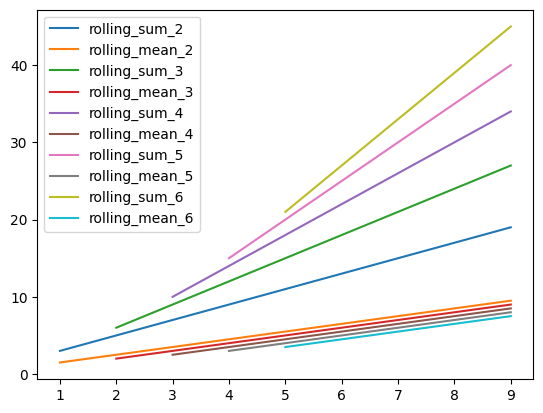

##### Задание 2.016

Используйте метод **expanding()** для вычисления скользящей суммы и среднего на последовательности чисел. 

Для этого выполните следующие шаги:
1. Создайте серию, содержащую числа от 1 до 10 включительно.
2. Примените метод expanding() для вычисления суммы и среднего значений.
3. Выведите результат для каждого из этих вычислений (сумма и среднее).
4. Постройте график для вычисленных суммы и среднего значений. Результат должен выглядеть как на изображении ниже.
5. Ответьте на вопросы:
    - Что происходит с результатами в п.3 и п.4? Почему?
    - Измените размер окна с 3 на 4 и повторите вычисления. Как изменится результат? Почему?

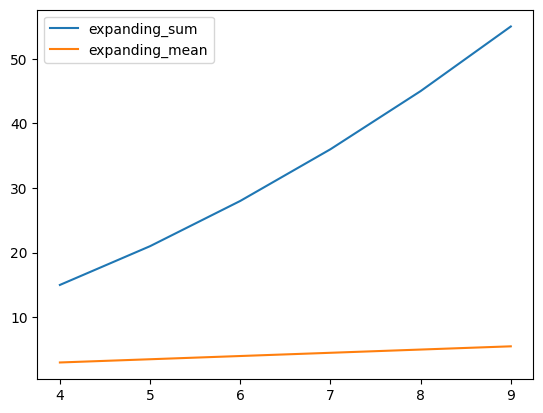

##### Задание 2.017

Придумайте и выполните задание по применению метода rolling на нечисловой серии.

##### Задание 2.018

Вы работаете в компании, которая анализирует данные о продажах. 

У вас есть данные о продажах продуктов в разных магазинах. Ваша задача — обработать их и провести несколько операций:
1. Применить скидку 10% ко всем продажам.
2. Отсортировать данные по убыванию количества проданных единиц.
3. Оставить только те товары, которые продались более чем 50 раз.
4. Рассчитать среднюю цену для оставшихся товаров.

Данные о продажах (Датафрейм):
- product: apple, banana, orange, pear, grape,
- sales: 100, 200, 50, 150, 80,
- price: 1.0, 0.5, 0.75, 1.2, 2.0

#### Вычисления и описательная статистика

|Функция|Описание|
|---|---|
|	Series.abs()	|	Возвращает Series/DataFrame с абсолютным числовым значением каждого элемента.	|
|	Series.all([axis, bool_only, skipna])	|	Возвращает, все ли элементы являются True, потенциально по оси.	|
|	Series.any(*[, axis, bool_only, skipna])	|	Возвращает, является ли любой элемент True, потенциально по оси.	|
|	Series.autocorr([lag])	|	Вычисляет автокорреляцию lag-N.	|
|   Series.corr(other[, method, min_periods])   |   Вычисляет корреляию с другой Series, исключая NaN  |
|	Series.count()	|	Возвращает количество не-NA/нулевых наблюдений в Series.	|
|	Series.cummax([axis, skipna])	|	Возвращает кумулятивный максимум по оси DataFrame или Series.	|
|	Series.cummin([axis, skipna])	|	Возвращает кумулятивный минимум по оси DataFrame или Series.	|
|	Series.describe([percentiles, include, exclude])	|	Генерирует описательную статистику.	|
|	Series.diff([periods])	|	Первая дискретная разность элемента.	|
|	Series.max([axis, skipna, numeric_only])	|	Возвращает максимальное значение по запрошенной оси.	|
|	Series.mean([axis, skipna, numeric_only])	|	Возвращает среднее значение по запрошенной оси.	|
|	Series.median([axis, skipna, numeric_only])	|	Возвращает медиану значений по запрошенной оси.	|
|	Series.min([axis, skipna, numeric_only])	|	Возвращает минимальное значение по запрошенной оси.	|
|	Series.mode([dropna])	|	Возвращает моду(ы) ряда.	|
|	Series.prod([axis, skipna, numeric_only, ...])	|	Возвращает произведение значений по запрошенной оси.	|
|	Series.quantile([q, interpolation])	|	Возвращает значение в заданном квантиле.	|
|	Series.std([axis, skipna, ddof, numeric_only])	|	Возвращает стандартное отклонение выборки по запрошенной оси.	|
|	Series.sum([axis, skipna, numeric_only, ...])	|	Возвращает сумму значений по запрошенной оси.	|
|	Series.unique()	|	Возвращает уникальные значения объекта ряда.	|
|	Series.nunique([dropna])	|	Возвращает количество уникальных элементов в объекте.	|
|	Series.is_unique	|	Возвращает логическое значение, если значения в объекте уникальны.	|
|	Series.is_monotonic_increasing	|	Возвращает логическое значение, если значения в объекте монотонно возрастают.	|
|	Series.is_monotonic_decreasing	|	Возвращает логическое значение, если значения в объекте монотонно убывают.	|
|	Series.value_counts([normalize, sort, ...])	|	Возвращает ряд, содержащий количество уникальных значений.	|


##### Series.abs()

In [5]:
s = pd.Series([-1.10, 2, -3.33, 4])
s

0   -1.10
1    2.00
2   -3.33
3    4.00
dtype: float64

In [6]:
s.abs()

0    1.10
1    2.00
2    3.33
3    4.00
dtype: float64

##### Series.all()

```python
Series.all(axis=0, bool_only=False, skipna=True, **kwargs)
```

In [7]:
pd.Series([True, True, False]).all()

False

In [8]:
pd.Series([True, True]).all()

True

In [9]:
pd.Series([True, True, 1]).all()

True

In [12]:
pd.Series([' ', 1, abs(0)]).all()

False

In [13]:
pd.Series([]).all()

True

In [ ]:
pd.Series([np.nan]).all()

True

In [20]:
pd.Series([np.nan]).all(skipna=False)

True

##### Series.any()

```python
Series.any(*, axis=0, bool_only=False, skipna=True, **kwargs)
```

In [21]:
pd.Series([True, True, False]).any()

True

In [22]:
pd.Series([False, False]).any()

False

In [23]:
pd.Series([]).any()

False

In [ ]:
pd.Series([np.nan]).any()

False

In [29]:
pd.Series([np.nan]).any(skipna=False)

True

##### Series.autocorr()

```python
Series.autocorr(lag=1)
```

In [30]:
s = pd.Series([0.25, 0.5, 0.2, -0.05])
s

0    0.25
1    0.50
2    0.20
3   -0.05
dtype: float64

In [31]:
s.autocorr()

0.1035526330902407

In [32]:
s.autocorr(lag=2)

-0.9999999999999999

In [33]:
s = pd.Series([0.25, 0.24, 0.2, 0.26])
s

0    0.25
1    0.24
2    0.20
3    0.26
dtype: float64

In [34]:
s.autocorr()

-0.6185895741317421

In [35]:
s.autocorr(lag=2)

-0.9999999999999999

In [36]:
s = pd.Series([1, 0, 0, 0])
s

0    1
1    0
2    0
3    0
dtype: int64

In [37]:
s.autocorr()

nan

In [38]:
ser1 = pd.Series([0.25, 0.24, 0.2, 0.26])
ser2 = pd.Series([0.25, 0.5, 0.2, -0.05])

<Axes: >

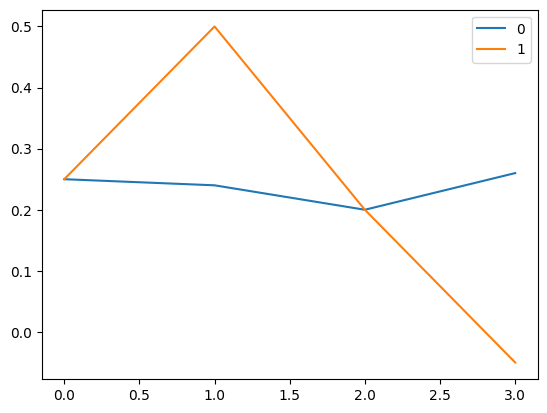

In [42]:
df = pd.concat([ser1, ser2], axis=1)
df.plot()

In [44]:
# df.autocorr()  # AttributeError: 'DataFrame' object has no attribute 'autocorr'

In [3]:
cycles = 2 # how many sine cycles
resolution = 25 # how many datapoints to generate

length = np.pi * 2 * cycles
my_wave = np.sin(np.arange(0, length, length / resolution))

In [5]:
my_wave

array([ 0.        ,  0.48175367,  0.84432793,  0.99802673,  0.90482705,
        0.58778525,  0.12533323, -0.36812455, -0.77051324, -0.98228725,
       -0.95105652, -0.68454711, -0.24868989,  0.24868989,  0.68454711,
        0.95105652,  0.98228725,  0.77051324,  0.36812455, -0.12533323,
       -0.58778525, -0.90482705, -0.99802673, -0.84432793, -0.48175367])

In [4]:
ser = pd.Series(my_wave)

In [6]:
ser

0     0.000000
1     0.481754
2     0.844328
3     0.998027
4     0.904827
5     0.587785
6     0.125333
7    -0.368125
8    -0.770513
9    -0.982287
10   -0.951057
11   -0.684547
12   -0.248690
13    0.248690
14    0.684547
15    0.951057
16    0.982287
17    0.770513
18    0.368125
19   -0.125333
20   -0.587785
21   -0.904827
22   -0.998027
23   -0.844328
24   -0.481754
dtype: float64

<Axes: >

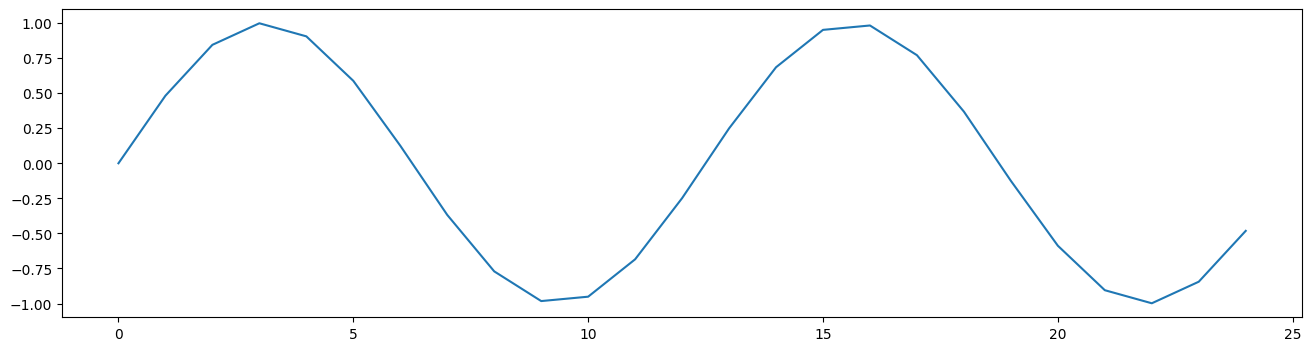

In [9]:
ser.plot(figsize=(16, 4))

In [23]:
l = []
for i in range(1, 23):
    l.append(ser.autocorr(i))

max(l)

0.9709383147180168

In [ ]:
s1 = pd.Series([1, 2, 3, 1, 2, 3])
                #        1, 2, 3, 1, 2, 3
s1.autocorr(3)

1.0

##### Series.corr()

```python
Series.corr(other, method='pearson', min_periods=None)
```

In [31]:
s1 = pd.Series([1.0, 2.0, 3.0])
s2 = pd.Series([0.5, 1.9, 3.1])
s1.corr(s2)

0.999015263178192

##### Series.count()

In [32]:
s = pd.Series([0.1, 1.1, np.nan])
s

0    0.1
1    1.1
2    NaN
dtype: float64

In [33]:
s.count()

2

##### Series.cummax()

```python
Series.cummax(axis=None, skipna=True, *args, **kwargs)
```

In [75]:
s = pd.Series([4, 3, 2, np.nan, 5, -1, 10])
s

0     4.0
1     3.0
2     2.0
3     NaN
4     5.0
5    -1.0
6    10.0
dtype: float64

In [38]:
s.cummax()

0     4.0
1     4.0
2     4.0
3     NaN
4     5.0
5     5.0
6    10.0
dtype: float64

In [39]:
s.cummax(skipna=False)

0    4.0
1    4.0
2    4.0
3    NaN
4    NaN
5    NaN
6    NaN
dtype: float64

In [91]:
df = pd.concat(
    [
        s, 
        s.cummax()
    ],
    axis=1
)
df = df.dropna()
df

,0,1
0,4.0,4.0
1,3.0,4.0
2,2.0,4.0
4,5.0,5.0
5,-1.0,5.0
6,10.0,10.0


<Axes: >

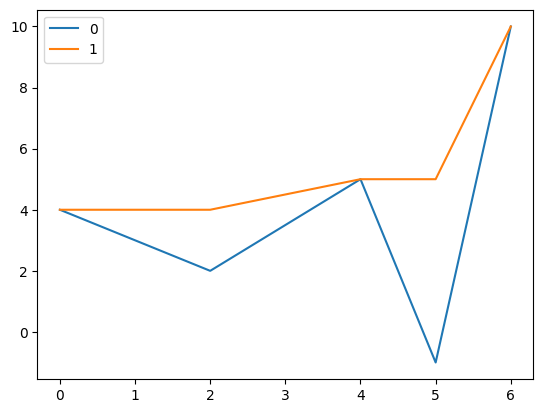

In [92]:
df.plot()

##### Series.cummin()

```python
Series.cummin(axis=None, skipna=True, *args, **kwargs)
```

##### Series.describe()

```python
Series.describe(percentiles=None, include=None, exclude=None)
```

percentiles: [0.25, 0.5, 0.75]

In [40]:
s = pd.Series([111, 222, 333])
s

0    111
1    222
2    333
dtype: int64

In [41]:
s.describe()

count      3.0
mean     222.0
std      111.0
min      111.0
25%      166.5
50%      222.0
75%      277.5
max      333.0
dtype: float64

In [47]:
s.describe(percentiles=[0.5])

count      3.0
mean     222.0
std      111.0
min      111.0
50%      222.0
max      333.0
dtype: float64

In [51]:
s = pd.Series(['ffff', 'ggg', 'vv', 'ffff', 'ggg', 'vv'])
s

0    ffff
1     ggg
2      vv
3    ffff
4     ggg
5      vv
dtype: object

In [52]:
s.describe()

count        6
unique       3
top       ffff
freq         2
dtype: object

In [57]:
s = pd.Series(
    [
        np.datetime64('2024-11-17'),
        np.datetime64('2024-11-16'),
        np.datetime64('2024-11-15'),
        np.datetime64('2024-11-14'),
        np.datetime64('2025-01-01'),
    ]
)
s

0   2024-11-17
1   2024-11-16
2   2024-11-15
3   2024-11-14
4   2025-01-01
dtype: datetime64[ns]

In [58]:
s.describe()

count                      5
mean     2024-11-24 19:12:00
min      2024-11-14 00:00:00
25%      2024-11-15 00:00:00
50%      2024-11-16 00:00:00
75%      2024-11-17 00:00:00
max      2025-01-01 00:00:00
dtype: object

In [69]:
df = pd.DataFrame(
    {
        'categorical': pd.Categorical(['z', 'x', 'y']),
        'numeric': [111, 222, 333],
        'object': ['ann', 'pet', 'den']
    }
)

df

,categorical,numeric,object
0,z,111,ann
1,x,222,pet
2,y,333,den


In [61]:
df.dtypes

categorical    category
numeric           int64
object           object
dtype: object

In [62]:
df.describe()

,numeric
count,3.0
mean,222.0
std,111.0
min,111.0
25%,166.5
50%,222.0
75%,277.5
max,333.0


In [70]:
df.describe(include='all')

,categorical,numeric,object
count,3,3.0,3
unique,3,NaN,3
top,x,NaN,ann
freq,1,NaN,1
mean,NaN,222.0,NaN
std,NaN,111.0,NaN
min,NaN,111.0,NaN
25%,NaN,166.5,NaN
50%,NaN,222.0,NaN
75%,NaN,277.5,NaN


In [74]:
df.describe(exclude=[object])

,categorical,numeric
count,3,3.0
unique,3,NaN
top,x,NaN
freq,1,NaN
mean,NaN,222.0
std,NaN,111.0
min,NaN,111.0
25%,NaN,166.5
50%,NaN,222.0
75%,NaN,277.5


##### Задание 2.019

Сделать свою функцию по образу метода describe() которая выводит статистику но нескольким любым методам изученным на текущий момент в данном разделе "Вычисления и описательная статистика"

##### Series.diff()

```python
Series.diff(periods=1)
```

In [2]:
s = pd.Series([1, 1, 2, 3, 5, 8])
s

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64

In [3]:
s.diff()

0    NaN
1    0.0
2    1.0
3    1.0
4    2.0
5    3.0
dtype: float64

In [4]:
s.diff(3)

0    NaN
1    NaN
2    NaN
3    2.0
4    4.0
5    6.0
dtype: float64

In [5]:
s.diff(-1)

0    0.0
1   -1.0
2   -1.0
3   -2.0
4   -3.0
5    NaN
dtype: float64

##### Series.max()

```python
Series.max(axis=0, skipna=True, numeric_only=False, **kwargs)
```

In [6]:
s = pd.Series([1, 1, 2, 3, 5, 8])
s

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64

In [8]:
s.diff(-1).max()

0.0

In [18]:
s = pd.Series(list('cba'))
s

0    c
1    b
2    a
dtype: object

In [19]:
s.max()

'c'

In [17]:
# s.max(numeric_only=True)  # TypeError: Series.max does not allow numeric_only=True with non-numeric dtypes.

##### Series.mean()

```python
Series.mean(axis=0, skipna=True, numeric_only=False, **kwargs)
```

In [26]:
s = pd.Series(list('cba'), index=[99, 98, 97])
s

99    c
98    b
97    a
dtype: object

In [29]:
# s.mean()  # TypeError: Could not convert cba to numeric

##### Series.mode()

```python
Series.mode(dropna=True)
```

In [30]:
s = pd.Series([1, 1, 2, 3, 5, 8])
s

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64

In [31]:
s.mode()

0    1
dtype: int64

In [39]:
s = pd.Series([1, 1, 2, 2, 3, 5, 5, 5, 8])
s

0    1
1    1
2    2
3    2
4    3
5    5
6    5
7    5
8    8
dtype: int64

In [40]:
s.mode()

0    5
dtype: int64

##### Series.prod()

```python
Series.prod(axis=None, skipna=True, numeric_only=False, min_count=0, **kwargs)
```

In [41]:
s = pd.Series([1, 1, 2, 3, 5, 8])
s

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64

In [42]:
s.prod()

240

In [43]:
pd.Series([]).prod()

1

In [45]:
0 ** 0

1

In [46]:
pd.Series([]).prod(min_count=1)

nan

In [47]:
s

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64

In [52]:
s.prod(min_count=7)

nan

In [53]:
pd.Series([np.nan]).prod()

1.0

##### Series.quantile()

```python
Series.quantile(q=0.5, interpolation='linear')
interpolation{‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}
```

In [54]:
s = pd.Series([1, 1, 2, 3, 5, 8])
s

0    1
1    1
2    2
3    3
4    5
5    8
dtype: int64

In [55]:
s.quantile(0.5)

2.5

In [56]:
s.quantile([0.25, 0.5, 0.75])

0.25    1.25
0.50    2.50
0.75    4.50
dtype: float64

In [57]:
s.describe()

count    6.000000
mean     3.333333
std      2.732520
min      1.000000
25%      1.250000
50%      2.500000
75%      4.500000
max      8.000000
dtype: float64

##### Series.std()

```python
Series.std(axis=None, skipna=True, ddof=1, numeric_only=False, **kwargs)
```

In [68]:
s = pd.Series([1, 1, 2, 3, 100, 5, 8])
s

0      1
1      1
2      2
3      3
4    100
5      5
6      8
dtype: int64

In [69]:
s.std()

36.62161734744736

##### Series.unique()

In [ ]:
pd.Series([1, 2, 2, np.nan, 2, np.nan, 0, 'a']).unique()

5

##### Series.nunique()

```python
Series.nunique(dropna=True)
```

In [72]:
pd.Series([1, 2, 2, np.nan, 2, np.nan, 0, 'a']).nunique(False)

5

##### Series.is_unique - атрибут серии

In [74]:
pd.Series([1, 2, 2, np.nan, 2, np.nan, 0, 'a']).is_unique

False

In [75]:
pd.Series([1, 2, 3, np.nan]).is_unique

True

##### Series.is_monotonic_increasing

In [84]:
s = pd.Series([1, 1, 2, 3, 5, 80, 80])
s

0     1
1     1
2     2
3     3
4     5
5    80
6    80
dtype: int64

In [83]:
s.is_monotonic_increasing

False

In [85]:
pd.Series([2, 2, 2]).is_monotonic_increasing

True

##### Series.is_monotonic_decreasing

In [86]:
pd.Series([1, 1, 2, 3, 5, 80, 80]).is_monotonic_decreasing

False

In [89]:
pd.Series([3, 3, 3]).is_monotonic_decreasing, pd.Series([3, 3, 3]).is_monotonic_increasing

(True, True)

In [90]:
pd.Series([3, 3, 1, -100]).is_monotonic_decreasing

True

##### Series.value_counts()

```python
Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
```

In [96]:
s = pd.Series([1, 1, 2, 3, np.nan, 5, 80, 80])
s

0     1.0
1     1.0
2     2.0
3     3.0
4     NaN
5     5.0
6    80.0
7    80.0
dtype: float64

In [98]:
s.value_counts()

1.0     2
80.0    2
2.0     1
3.0     1
5.0     1
Name: count, dtype: int64

In [110]:
s1 = s.value_counts().reset_index()['count']
s1

0    2
1    2
2    1
3    1
4    1
Name: count, dtype: int64

In [99]:
s.value_counts(normalize=True)

1.0     0.285714
80.0    0.285714
2.0     0.142857
3.0     0.142857
5.0     0.142857
Name: proportion, dtype: float64

In [111]:
s2 = s.value_counts(normalize=True).reset_index()['proportion']

In [116]:
from matplotlib import pyplot as plt

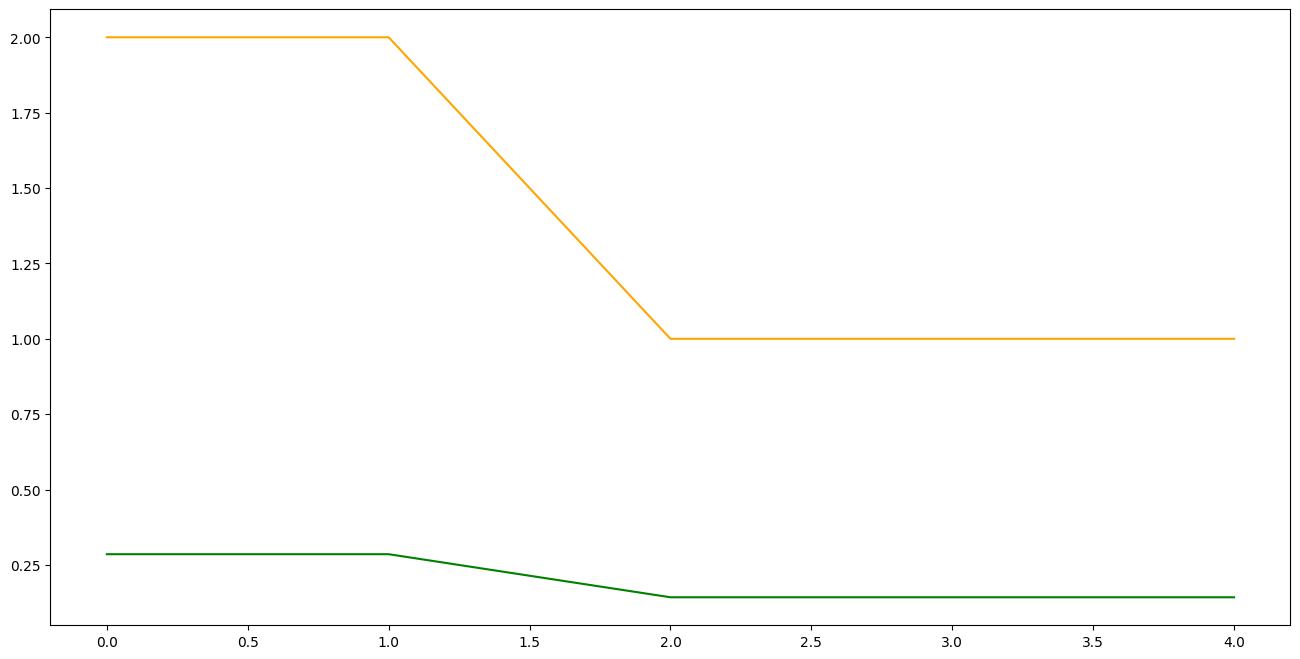

In [117]:
plt.figure(figsize=(16, 8), alpha=0.3)
plt.plot(s1, color='orange')  
plt.plot(s2, color='green')
plt.show()

In [118]:
s

0     1.0
1     1.0
2     2.0
3     3.0
4     NaN
5     5.0
6    80.0
7    80.0
dtype: float64

In [126]:
s.value_counts()

1.0     2
80.0    2
2.0     1
3.0     1
5.0     1
Name: count, dtype: int64

In [127]:
s.value_counts(bins=5)

(0.92, 16.8]    5
(64.2, 80.0]    2
(16.8, 32.6]    0
(32.6, 48.4]    0
(48.4, 64.2]    0
Name: count, dtype: int64

In [130]:
(80 - 1)/5

15.8

In [131]:
s.value_counts(bins=2)

(0.92, 40.5]    5
(40.5, 80.0]    2
Name: count, dtype: int64

##### Задание 2.020

**Исследование датасета student-por.csv с использованием методов Series**

Ваша задача — провести исследование датасета student-por.csv, используя все методы из списка ниже. Для каждого метода выполните следующие шаги:
- Примените метод к подходящему столбцу или набору данных.
- Интерпретируйте полученные результаты (что они означают с точки зрения анализа данных).
- Сделайте выводы на основе полученной информации.

Методы для выполнения:

1. all и any:
    - Выясните, есть ли столбец, в котором все значения удовлетворяют определённому условию (например, все студенты планируют поступить в вуз).
    - Проверьте, есть ли в другом столбце хотя бы одно значение, соответствующее условию (например, хотя бы один студент пропустил занятия).

2. autocorr и corr:
    - Найдите автокорреляцию для числового столбца (например, оценок G1).
    - Определите корреляцию между двумя столбцами, такими как studytime и итоговой оценкой G3.

3. max, min, mean, median:
    - Определите максимальные, минимальные, средние и медианные значения для столбцов, таких как возраст, количество пропусков или оценок.

4. quantile и std:
    - Найдите различные квантили (например, 25%, 50%, 75%) для оценок G3.
    - Определите стандартное отклонение для количества пропусков (absences).

5. sum, prod, count:
    - Вычислите суммарное количество пропусков по всем студентам.
    - Найдите произведение значений (например, перемножьте оценки одного студента).
    - Подсчитайте количество записей в каждом столбце.

6. is_unique, is_monotonic_increasing, is_monotonic_decreasing:
    - Проверьте, являются ли значения в столбце age уникальными.
    - Проверьте, упорядочены ли оценки студентов за первый триместр (G1) по возрастанию или убыванию.

7. abs:
    - Для целочисленных столбцов, таких как diff (разницы оценок между триместрами), найдите абсолютные значения.

8. unique, nunique, value_counts, mode:
    - Выведите уникальные значения для столбцов, таких как reason или guardian.
    - Подсчитайте количество уникальных значений в выбранных столбцах.
    - Найдите самое частое значение (моду) для столбца famsize.
    - Подсчитайте частоты каждого значения в столбце traveltime.

9. cummax, cummin, diff:
    - Найдите накопленные максимумы и минимумы для числового столбца, такого как оценки G3.
    - Рассчитайте разности между значениями подряд идущих строк для столбца absences.

Формат отчёта:
- Предоставьте интерпретацию полученных результатов.
- Сделайте выводы о том, как данные могут быть полезны для анализа успеваемости студентов.

#### Переиндексация. Выборка. Манипулирование метками

|Функция|Описание|
|---|---|
|	Series.align(other[, join, axis, level, ...])	|	Выровнять два объекта по их осям с помощью указанного метода соединения.	|
|		|		|
|	Series.drop([labels, axis, index, columns, ...])	|	Вернуть Series с удаленными указанными метками индекса.	|
|	Series.droplevel(level[, axis])	|	Вернуть Series/DataFrame с удаленными запрошенными индексами/уровнями столбцов.	|
|	Series.drop_duplicates(*[, keep, inplace, ...])	|	Вернуть Series с удаленными дублирующими значениями.	|
|	Series.duplicated([keep])	|	Указать дублирующие значения Series.	|
|	Series.truncate([before, after, axis, copy])	|	Обрезать Series или DataFrame до и после некоторого значения индекса.	|
|		|		|
|	Series.head([n])	|	Вернуть первые n строк.	|
|	Series.tail([n])	|	Вернуть последние n строк.	|
|		|		|
|	Series.idxmax([axis, skipna])	|	Вернуть метку строки максимального значения.	|
|	Series.idxmin([axis, skipna])	|	Вернуть метку строки минимального значения.	|
|		|		|
|	Series.equals(other)	|	Проверить, содержат ли два объекта одинаковые элементы.	|
|	Series.isin(values)	|	Проверить содержатся ли элементы в Series в значениях.	|
|		|		|
|	Series.reindex([index, axis, method, copy, ...])	|	Переиндексировать Series новыми индексами с дополнительной логикой заполнения.	|
|	Series.reindex_like(other[, method, copy, ...])	|	Вернуть объект с совпадающими индексами как другой объект.	|
|	Series.rename([index, axis, copy, inplace, ...])	|	Изменить метки или имя индекса Series.	|
|	Series.rename_axis([mapper, index, axis, ...])	|	Задать имя оси для индекса или столбцов.	|
|	Series.reset_index([level, drop, name, ...])	|	Сгенерировать новый DataFrame или Series со сбросом индекса.	|
|		|		|
|	Series.sample([n, frac, replace, weights, ...])	|	Вернуть случайную выборку элементов из оси объекта.	|
|	Series.take(indices[, axis])	|	Вернуть элементы в заданных позиционных индексах вдоль оси.	|
|		|		|
|	Series.case_when(caselist)	|	Заменить значения, где условия истинны.	|
|	Series.where(cond[, other, inplace, axis, level])	|	Заменить значения, где условие ложно.	|
|	Series.mask(cond[, other, inplace, axis, level])	|	Заменить значения, где условие истинно.	|
|		|		|
|	Series.add_prefix(prefix[, axis])	|	Добавить к меткам префикс строки.	|
|	Series.add_suffix(suffix[, axis])	|	Добавить к меткам суффикс строки.	|
|		|		|
|	Series.filter([items, like, regex, axis])	|	Отфильтровать подмножество строк или столбцов dataframe в соответствии с указанными метками индекса.	|


##### Series.align()

```python
Series.align(
    other, 
    join='outer', 
    axis=None, 
    level=None, 
    copy=None, 
    fill_value=None, 
    method=<no_default>,  # Устарело с версии 2.1
    limit=<no_default>,  # Устарело с версии 2.1
    fill_axis=<no_default>,  # Устарело с версии 2.1
     broadcast_axis=<no_default>  # Устарело с версии 2.1
)
```

join: **outer**, inner, left, right 

In [17]:
df1 = pd.DataFrame(
    [
        [23, 34, 45, 56],
        [67, 78, 89, 90]
    ],
    columns=['ann', 'pet', 'den', 'cat'], 
    index=[0, 1]
)
df1

,ann,pet,den,cat
0,23,34,45,56
1,67,78,89,90


In [18]:
df2 = pd.DataFrame(
    [
        [230, 340, 450, 560],
        [670, 780, 890, 900],
        [111, 222, 333, 444],

    ],
    columns=['ann', 'PET', 'den', 'CAT'], 
    index=[0, 1, 2]
)
df2

,ann,PET,den,CAT
0,230,340,450,560
1,670,780,890,900
2,111,222,333,444


In [19]:
left, right = df1.align(df2, axis=1)

In [20]:
left

,CAT,PET,ann,cat,den,pet
0,NaN,NaN,23,56,45,34
1,NaN,NaN,67,90,89,78


In [21]:
right

,CAT,PET,ann,cat,den,pet
0,560,340,230,NaN,450,NaN
1,900,780,670,NaN,890,NaN
2,444,222,111,NaN,333,NaN


In [24]:
left, right = df1.align(df2, axis=0)

In [27]:
left

,ann,pet,den,cat
0,23.0,34.0,45.0,56.0
1,67.0,78.0,89.0,90.0
2,NaN,NaN,NaN,NaN


In [26]:
right

,ann,PET,den,CAT
0,230,340,450,560
1,670,780,890,900
2,111,222,333,444


In [32]:
left, right = df1.align(df2, join='outer', axis=None)

In [33]:
left

,CAT,PET,ann,cat,den,pet
0,NaN,NaN,23.0,56.0,45.0,34.0
1,NaN,NaN,67.0,90.0,89.0,78.0
2,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
right

,CAT,PET,ann,cat,den,pet
0,560,340,230,NaN,450,NaN
1,900,780,670,NaN,890,NaN
2,444,222,111,NaN,333,NaN


In [36]:
left, right = df1.align(df2, join='inner', axis=None)

In [37]:
left

,ann,den
0,23,45
1,67,89


In [38]:
right

,ann,den
0,230,450
1,670,890


In [39]:
left, right = df1.align(df2, join='left', axis=None)

In [40]:
left

,ann,pet,den,cat
0,23,34,45,56
1,67,78,89,90


In [41]:
right

,ann,pet,den,cat
0,230,NaN,450,NaN
1,670,NaN,890,NaN


##### Series.drop()

```python
Series.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
```

In [12]:
arr = [
    ['ann', 'den', 'ann', 'cat'],
    ['otd 1', 'otd 2', 'otd 1', 'otd 2']
]

index = pd.MultiIndex.from_arrays(arr, names=('Name', 'Otd'))

ser = pd.Series([100., 200., 300., 400.], index=index, name='Salary')
ser

Name  Otd  
ann   otd 1    100.0
den   otd 2    200.0
ann   otd 1    300.0
cat   otd 2    400.0
Name: Salary, dtype: float64

In [18]:
ser.drop(labels='otd 2', level=1)

Name  Otd  
ann   otd 1    100.0
      otd 1    300.0
Name: Salary, dtype: float64

In [19]:
ser.drop(labels=['ann', 'den'], level=0)

Name  Otd  
cat   otd 2    400.0
Name: Salary, dtype: float64

##### Series.drop_level()

```python
Series.droplevel(level, axis=0)
```

In [20]:
arr = [
    ['ann', 'den', 'ann', 'cat'],
    ['otd 1', 'otd 2', 'otd 1', 'otd 2']
]

index = pd.MultiIndex.from_arrays(arr, names=('Name', 'Otd'))

ser = pd.Series([100., 200., 300., 400.], index=index, name='Salary')
ser

Name  Otd  
ann   otd 1    100.0
den   otd 2    200.0
ann   otd 1    300.0
cat   otd 2    400.0
Name: Salary, dtype: float64

In [26]:
ser.droplevel([0])

Otd
otd 1    100.0
otd 2    200.0
otd 1    300.0
otd 2    400.0
Name: Salary, dtype: float64

##### Series.drop_duplicates()

```python
Series.drop_duplicates(*, keep='first', inplace=False, ignore_index=False)
```

In [28]:
arr = [
    ['ann', 'den', 'ann', 'cat'],
    ['otd 1', 'otd 2', 'otd 1', 'otd 2']
]

index = pd.MultiIndex.from_arrays(arr, names=('Name', 'Otd'))

ser = pd.Series([100., 200., 200., 400.], index=index, name='Salary')
ser

Name  Otd  
ann   otd 1    100.0
den   otd 2    200.0
ann   otd 1    200.0
cat   otd 2    400.0
Name: Salary, dtype: float64

In [31]:
ser.drop_duplicates(keep=False)

Name  Otd  
ann   otd 1    100.0
cat   otd 2    400.0
Name: Salary, dtype: float64

In [32]:
ser = pd.Series([100., 200., 200., 400.])
ser

0    100.0
1    200.0
2    200.0
3    400.0
dtype: float64

In [35]:
ser.drop_duplicates(keep=False)

0    100.0
3    400.0
dtype: float64

##### Series.duplicated()

```python
Series.duplicated(keep='first')
```

In [38]:
ser = pd.Series([100., 200., 200., 200., 400.])
ser

0    100.0
1    200.0
2    200.0
3    200.0
4    400.0
dtype: float64

In [41]:
ser.duplicated(keep='last')

0    False
1     True
2     True
3    False
4    False
dtype: bool

##### Series.truncate()

```python
Series.truncate(before=None, after=None, axis=None, copy=None)
```

In [55]:
arr = [
    [0, 1, 2, 3],
    ['otd 1', 'otd 2', 'otd 1', 'otd 2']
]

index = pd.MultiIndex.from_arrays(arr, names=('idx', 'Otd'))

ser = pd.Series([100., 200., 300., 400.], index=index, name='Salary')
ser

idx  Otd  
0    otd 1    100.0
1    otd 2    200.0
2    otd 1    300.0
3    otd 2    400.0
Name: Salary, dtype: float64

In [56]:
ser.truncate(after=2)

idx  Otd  
0    otd 1    100.0
1    otd 2    200.0
2    otd 1    300.0
Name: Salary, dtype: float64

In [47]:
ser = pd.Series([100., 200., 200., 200., 400.])
ser.truncate(before=1, after=3)

1    200.0
2    200.0
3    200.0
dtype: float64

In [58]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [63]:
df[['G1', 'G2', 'G3']].truncate(after='G2', axis='columns')

,G1,G2
0,0,11
1,9,11
2,12,13
3,14,14
4,11,13
...,...,...
644,10,11
645,15,15
646,11,12
647,10,10


In [68]:
ser = pd.Series([100., 200., 200., 200., 400.], index=[0, 1, 3, 7, 10])
ser.truncate(before=1, after=7)

1    200.0
3    200.0
7    200.0
dtype: float64

##### Задание 2.021

Выбрать из датасета "student-por.csv" строки 5..7, 27..37, 100..103 самым простым способом. 

Аргументируйте почему вы выбрали именно этот способ, вместо других.

##### Series.head() и Series.tail()

In [5]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [12]:
df.tail(-50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
50,GP,F,16,U,LE3,T,2,2,services,services,...,4,3,3,2,3,4,0,14,13,13
51,GP,F,15,U,LE3,T,4,2,health,other,...,4,3,3,1,1,5,0,16,14,16
52,GP,M,15,U,LE3,A,4,2,health,health,...,5,5,5,3,4,5,4,10,9,9
53,GP,F,15,U,GT3,T,4,4,services,services,...,3,3,4,2,3,5,0,13,12,12
54,GP,F,15,U,LE3,A,3,3,other,other,...,5,3,4,4,4,1,0,13,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


##### Series.idmax() и Series.idmin()

Series.idxmax(axis=0, skipna=True, *args, **kwargs)

In [13]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [19]:
df.age.idxmax()

279

In [ ]:
df.age.idxmin()

2

##### Series.equals()

```python
Series.equals(other)
```

In [6]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
pd.DataFrame({10: [111], 30: [333]}).equals(pd.DataFrame({10: [111, 222], 30: [333, 444]}))

False

In [11]:
df.equals(df.G1)

False

In [15]:
df1 = pd.DataFrame({'C': [111, 222, 333]})
df1

,C
0,111
1,222
2,333


In [17]:
df1.C

0    111
1    222
2    333
Name: C, dtype: int64

In [16]:
df1.equals(df1.C)

False

In [19]:
df1.C.equals(df1)

False

In [27]:
df2 = pd.DataFrame({'C': [111, 222, 333]}, index=[1, 2, 3])
df2

,C
1,111
2,222
3,333


In [28]:
df1.C, df2.C

(0    111
 1    222
 2    333
 Name: C, dtype: int64,
 1    111
 2    222
 3    333
 Name: C, dtype: int64)

In [29]:
df1.C.equals(df2.C)

False

##### Series.isin()

```python
Series.isin(values)
```

values: множество или список (и т.п)

In [31]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [40]:
df.G1.isin(range(12, 15))

0      False
1      False
2       True
3       True
4      False
       ...  
644    False
645    False
646    False
647    False
648    False
Name: G1, Length: 649, dtype: bool

##### Series.reindex()

```python
Series.reindex(
    index=None, 
    *, 
    axis=None, 
    method=None, 
    copy=None, 
    level=None, 
    fill_value=None, 
    limit=None, 
    tolerance=None
)
```

method: None, backfill/bfill, pad/ffill, nearest

In [ ]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [8]:
df_ten = pd.concat([df.head(), df.tail()], axis=0)
df_ten

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [14]:
df_ten.reindex(range(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ten.reindex(range(10, 0, -1), method='nearest')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,0.0,11.0,13.0,13.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,0.0,14.0,14.0,14.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,6.0,12.0,13.0,12.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,2.0,9.0,11.0,11.0


In [22]:
index = ['audi', 'bmv', 'porsche', 'shkoda', 'lada']
df = pd.DataFrame(
    {
        'price': [10_000, 20_000, 30_000, 40_000, 50_000],
        'power': [100, 200, 300, 400, 500]
    },
    index=index
)
df

,price,power
audi,10000,100
bmv,20000,200
porsche,30000,300
shkoda,40000,400
lada,50000,500


In [23]:
index_new = ['audi', 'bmv', 'volwo', 'mercedes', 'lada']
df.reindex(index_new)

,price,power
audi,10000.0,100.0
bmv,20000.0,200.0
volwo,NaN,NaN
mercedes,NaN,NaN
lada,50000.0,500.0


In [28]:
index_new = ['audi', 'bmv', 'volwo', 'mercedes', 'lada']
df.reindex(index_new, fill_value=0.0)

,price,power
audi,10000.0,100.0
bmv,20000.0,200.0
volwo,0.0,0.0
mercedes,0.0,0.0
lada,50000.0,500.0


In [33]:
index_new = ['audi', 'bmv', 'volwo', 'mercedes', 'lada']
df.reindex(index_new, fill_value='---')

,price,power
audi,10000,100
bmv,20000,200
volwo,---,---
mercedes,---,---
lada,50000,500


In [34]:
df.reindex(columns=['cost', 'power'])

,cost,power
audi,NaN,100
bmv,NaN,200
porsche,NaN,300
shkoda,NaN,400
lada,NaN,500


In [43]:
df.reindex(columns=['cost', 'power'])

,cost,power
audi,NaN,100
bmv,NaN,200
porsche,NaN,300
shkoda,NaN,400
lada,NaN,500


In [44]:
d_index = pd.date_range('11/24/2024', periods=10, freq='D')
df = pd.DataFrame(
    {
        'salary': [100, 700, 130, np.nan, 500, 600, 111, 222, 333, 444]
    },
    index=d_index
)
df

,salary
2024-11-24,100.0
2024-11-25,700.0
2024-11-26,130.0
2024-11-27,NaN
2024-11-28,500.0
2024-11-29,600.0
2024-11-30,111.0
2024-12-01,222.0
2024-12-02,333.0
2024-12-03,444.0


In [47]:
d_index_2 = pd.date_range('11/20/2024', periods=15, freq='D')
df.reindex(d_index_2)

,salary
2024-11-20,NaN
2024-11-21,NaN
2024-11-22,NaN
2024-11-23,NaN
2024-11-24,100.0
2024-11-25,700.0
2024-11-26,130.0
2024-11-27,NaN
2024-11-28,500.0
2024-11-29,600.0


In [50]:
d_index_2 = pd.date_range('11/20/2024', periods=15, freq='D')
df.reindex(d_index_2, method='nearest')

,salary
2024-11-20,100.0
2024-11-21,100.0
2024-11-22,100.0
2024-11-23,100.0
2024-11-24,100.0
2024-11-25,700.0
2024-11-26,130.0
2024-11-27,NaN
2024-11-28,500.0
2024-11-29,600.0


##### Series.reindex_like()

```python
Series.reindex_like(other, method=None, copy=None, limit=None, tolerance=None)
```

In [3]:
d_index = pd.date_range('11/24/2024', periods=10, freq='D')
df1 = pd.DataFrame(
    {
        'salary': [100, 700, 130, np.nan, 500, 600, 111, 222, 333, 444]
    },
    index=d_index
)
df1

,salary
2024-11-24,100.0
2024-11-25,700.0
2024-11-26,130.0
2024-11-27,NaN
2024-11-28,500.0
2024-11-29,600.0
2024-11-30,111.0
2024-12-01,222.0
2024-12-02,333.0
2024-12-03,444.0


In [7]:
d_index = pd.date_range('11/20/2024', periods=10, freq='D')
df2 = pd.DataFrame(
    {
        'salary': [100, 700, 130, np.nan, 500, 600, 111, 222, 333, 444]
    },
    index=d_index
)
df2

,salary
2024-11-20,100.0
2024-11-21,700.0
2024-11-22,130.0
2024-11-23,NaN
2024-11-24,500.0
2024-11-25,600.0
2024-11-26,111.0
2024-11-27,222.0
2024-11-28,333.0
2024-11-29,444.0


In [8]:
df1.reindex_like(df2)

,salary
2024-11-20,NaN
2024-11-21,NaN
2024-11-22,NaN
2024-11-23,NaN
2024-11-24,100.0
2024-11-25,700.0
2024-11-26,130.0
2024-11-27,NaN
2024-11-28,500.0
2024-11-29,600.0


In [6]:
df2.reindex_like(df1)

,salary
2024-11-24,NaN
2024-11-25,NaN
2024-11-26,NaN
2024-11-27,NaN
2024-11-28,NaN
2024-11-29,NaN
2024-11-30,NaN
2024-12-01,NaN
2024-12-02,NaN
2024-12-03,NaN


##### Series.rename()

```python
Series.rename(index=None, *, axis=None, copy=None, inplace=False, level=None, errors='ignore')
```

In [10]:
s = pd.Series(range(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [13]:
(s.name, )

(None,)

In [11]:
s.rename('numbers')

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: numbers, dtype: int64

In [15]:
s.rename(lambda x: x + 10)

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
dtype: int64

In [16]:
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [17]:
s.rename({4: 40, 5: 50})

0     0
1     1
2     2
3     3
40    4
50    5
6     6
7     7
8     8
9     9
dtype: int64

##### Series.rename_axis()

```python
Series.rename_axis(mapper=<no_default>, *, index=<no_default>, axis=0, copy=True, inplace=False)
```

In [18]:
s = pd.Series(range(10))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [19]:
s.rename_axis('numbers')

numbers
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [24]:
(s.name, )

(None,)

In [25]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [26]:
df.rename_axis('student-por')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
student-por,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9


##### Series.reset_index()

```python
Series.reset_index(level=None, *, drop=False, name=<no_default>, inplace=False, allow_duplicates=False)
```

##### Series.sample()

```python
Series.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)
```

In [27]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [40]:
df.age.sample(n=5, random_state=123)

376    18
142    18
43     15
162    15
351    20
Name: age, dtype: int64

In [62]:
df.age.sample(frac=0.5, replace=True, random_state=123)

510    17
365    17
382    17
322    19
98     16
       ..
222    16
403    17
442    15
6      16
583    18
Name: age, Length: 324, dtype: int64

In [63]:
df.sample(frac=0.5, replace=True, random_state=123)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
510,MS,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,1,1,0,15,17,17
365,GP,F,17,U,GT3,A,4,3,services,services,...,5,2,2,1,2,5,14,15,14,17
382,GP,F,17,U,GT3,T,3,3,at_home,other,...,4,2,5,2,5,5,2,11,12,11
322,GP,F,19,R,GT3,T,3,2,services,services,...,3,3,3,4,3,3,0,9,8,10
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,4,12,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,GP,F,16,U,GT3,T,1,1,at_home,other,...,4,3,2,1,4,5,2,12,13,13
403,GP,F,17,U,GT3,T,2,1,services,other,...,4,3,4,2,2,1,10,12,15,15
442,MS,M,15,R,LE3,T,4,1,health,services,...,5,3,4,1,2,2,0,12,13,14
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13


##### Series.take()

```python
Series.take(indices, axis=0, **kwargs)
```

In [64]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [67]:
df.take([0, -5])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10


In [66]:
df.take(range(50, 100, 5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
50,GP,F,16,U,LE3,T,2,2,services,services,...,4,3,3,2,3,4,0,14,13,13
55,GP,F,16,U,GT3,A,2,1,other,other,...,5,3,4,1,1,2,2,12,13,12
60,GP,F,16,R,GT3,T,4,4,health,teacher,...,2,4,4,2,3,4,0,17,16,16
65,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,16
70,GP,M,16,U,GT3,T,3,1,other,other,...,4,3,2,1,1,5,2,13,11,11
75,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,3,3,2,3,5,0,11,11,11
80,GP,M,15,U,GT3,T,2,3,other,services,...,3,2,2,1,3,3,0,11,11,12
85,GP,F,15,U,GT3,T,4,4,services,services,...,4,4,4,2,3,5,4,12,11,12
90,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,3,1,3,4,2,9,11,11
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13


In [69]:
df.take([0, 1, 2], axis=1)

,school,sex,age
0,GP,F,18
1,GP,F,17
2,GP,F,15
3,GP,F,15
4,GP,F,16
...,...,...,...
644,MS,F,19
645,MS,F,18
646,MS,F,18
647,MS,M,17


##### Series.case_when()

```python
Series.case_when(caselist)
```

caselist: [(condition0, replacement0), (condition1, replacement1), ... ]

In [72]:
a = pd.Series([123, 234, 456, 567])
a

0    123
1    234
2    456
3    567
dtype: int64

In [73]:
b = pd.Series([0, 1, 2, 3])
b

0    0
1    1
2    2
3    3
dtype: int64

In [79]:
c = pd.Series([10, 20, 30, 40])
c

0    10
1    20
2    30
3    40
dtype: int64

In [80]:
c.case_when(
    [
        (a.gt(200), a),
        (b.gt(200), b)
    ]
) # 2.2.0

0     10
1    234
2    456
3    567
dtype: int64

In [81]:
c.case_when(
    [
        (a.gt(300), a),
        (b.lt(2), b)
    ]
) # 2.2.0

0      0
1      1
2    456
3    567
dtype: int64

In [ ]:
c.case_when(
    [
        (a.gt(0), a),
        (b.gt(0), b)
    ]
) # 2.2.0

0    123
1    234
2    456
3    567
dtype: int64

In [83]:
a = pd.Series([123, 234, 456, 567])
a

0    123
1    234
2    456
3    567
dtype: int64

In [87]:
b = pd.Series([0, 1, 2])
b

0    0
1    1
2    2
dtype: int64

In [85]:
c = pd.Series([10, 20, 30, 40, 50])
c

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [88]:
c.case_when(
    [
        (a.gt(0), a),
        (b.gt(0), b)
    ]
) # 2.2.0

0    123.0
1    234.0
2    456.0
3    567.0
4      NaN
dtype: float64

##### Series.where() и Series.mask()

```python
Series.where(cond, other=nan, *, inplace=False, axis=None, level=None)
Series.mask(cond, other=nan, *, inplace=False, axis=None, level=None)
```

In [7]:
s = pd.Series(range(11, 21))
s

0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
9    20
dtype: int64

In [9]:
s.where(s > 15)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5    16.0
6    17.0
7    18.0
8    19.0
9    20.0
dtype: float64

In [10]:
s.mask(s > 15)

0    11.0
1    12.0
2    13.0
3    14.0
4    15.0
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64

In [ ]:
t = pd.Series([True, False, True])
s.where(t, 99)

0    11
1    99
2    13
3    99
4    99
5    99
6    99
7    99
8    99
9    99
dtype: int64

In [15]:
s.mask(t, 99)

0    99
1    12
2    99
3    99
4    99
5    99
6    99
7    99
8    99
9    99
dtype: int64

In [16]:
s.where(t, range(10))

0    11
1     1
2    13
3     3
4     4
5     5
6     6
7     7
8     8
9     9
dtype: int64

In [19]:
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df

,A,B
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9


In [24]:
c = df % 3 == 0
df.where(c, -df)

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


In [25]:
df.where(c, -df) == np.where(c, df, -df)

,A,B
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [31]:
df.where(c, -df)

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


In [32]:
~c

,A,B
0,False,True
1,True,False
2,True,True
3,False,True
4,True,False


In [34]:
df.where(c, -df) == df.mask(~c, -df)

,A,B
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


In [37]:
df_numbers_var1 = df.where(c, -df)
df_nmbers_var2 = df.mask(~c, -df)

df_numbers_var1 == df_nmbers_var2

,A,B
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


##### Series.add_prefix() и Series.add_suff()

```python
Series.add_prefix(prefix, axis=None)
Series.add_suffix(suffix, axis=None)
```

In [38]:
s = pd.Series(range(1, 11))
s

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [39]:
s.add_prefix('cat_')

cat_0     1
cat_1     2
cat_2     3
cat_3     4
cat_4     5
cat_5     6
cat_6     7
cat_7     8
cat_8     9
cat_9    10
dtype: int64

In [40]:
df = pd.DataFrame(
    {
        'col1': range(5),
        'col2': range(100, 105)
    }
)
df

,col1,col2
0,0,100
1,1,101
2,2,102
3,3,103
4,4,104


In [48]:
df.add_prefix('pref_', axis = None)

,pref_col1,pref_col2
0,0,100
1,1,101
2,2,102
3,3,103
4,4,104


In [50]:
df.add_suffix('_suf', axis = 0)

,col1,col2
0_suf,0,100
1_suf,1,101
2_suf,2,102
3_suf,3,103
4_suf,4,104


##### Series.filter()

```python
Series.filter(items=None, like=None, regex=None, axis=None)
```

In [53]:
df = pd.read_csv('../../data/student-por.csv', delimiter=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [54]:
df.filter(items=['age', 'address'])

,age,address
0,18,U
1,17,U
2,15,U
3,15,U
4,16,U
...,...,...
644,19,R
645,18,U
646,18,U
647,17,U


In [57]:
df.filter(regex='fam.')

,famsize,famsup,famrel
0,GT3,no,4
1,GT3,yes,5
2,LE3,no,4
3,GT3,yes,3
4,GT3,yes,4
...,...,...,...
644,GT3,no,5
645,LE3,yes,4
646,GT3,no,1
647,LE3,no,2


In [58]:
df.filter(like='job')

,Mjob,Fjob
0,at_home,teacher
1,at_home,other
2,at_home,other
3,health,services
4,other,other
...,...,...
644,services,other
645,teacher,services
646,other,other
647,services,services


In [59]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [62]:
df.filter(regex='^[a-z]+$').columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'reason', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences'],
      dtype='object')

#### Обработка отсутствующих данных

##### Series.bfill() и Series.ffiil()

```python
Series.bfill(*, axis=None, inplace=False, limit=None, limit_area=None, downcast=<no_default>)
Series.ffill(*, axis=None, inplace=False, limit=None, limit_area=None, downcast=<no_default>)
```

In [2]:
s = pd.Series([1, np.nan, np.nan, *range(10, 20)])
s

0      1.0
1      NaN
2      NaN
3     10.0
4     11.0
5     12.0
6     13.0
7     14.0
8     15.0
9     16.0
10    17.0
11    18.0
12    19.0
dtype: float64

In [4]:
s.bfill()

0      1.0
1     10.0
2     10.0
3     10.0
4     11.0
5     12.0
6     13.0
7     14.0
8     15.0
9     16.0
10    17.0
11    18.0
12    19.0
dtype: float64

In [5]:
s.ffill()

0      1.0
1      1.0
2      1.0
3     10.0
4     11.0
5     12.0
6     13.0
7     14.0
8     15.0
9     16.0
10    17.0
11    18.0
12    19.0
dtype: float64

In [8]:
s

0      1.0
1      NaN
2      NaN
3     10.0
4     11.0
5     12.0
6     13.0
7     14.0
8     15.0
9     16.0
10    17.0
11    18.0
12    19.0
dtype: float64

##### Series.fillna()

```python
Series.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=<no_default>)
```

In [9]:
s = pd.Series([1, np.nan, np.nan, *range(10, 20)])
s

0      1.0
1      NaN
2      NaN
3     10.0
4     11.0
5     12.0
6     13.0
7     14.0
8     15.0
9     16.0
10    17.0
11    18.0
12    19.0
dtype: float64

In [10]:
s.fillna(0)

0      1.0
1      0.0
2      0.0
3     10.0
4     11.0
5     12.0
6     13.0
7     14.0
8     15.0
9     16.0
10    17.0
11    18.0
12    19.0
dtype: float64

##### Series.dropna()

```python
Series.dropna(*, axis=0, inplace=False, how=None, ignore_index=False)
```

In [8]:
s = pd.Series([1, np.nan, np.nan, pd.NaT, None, '', [], *range(10, 20)])
s

0        1
1      NaN
2      NaN
3      NaT
4     None
5         
6       []
7       10
8       11
9       12
10      13
11      14
12      15
13      16
14      17
15      18
16      19
dtype: object

In [9]:
s.dropna()

0      1
5       
6     []
7     10
8     11
9     12
10    13
11    14
12    15
13    16
14    17
15    18
16    19
dtype: object

In [10]:
s.dropna(ignore_index=True)

0      1
1       
2     []
3     10
4     11
5     12
6     13
7     14
8     15
9     16
10    17
11    18
12    19
dtype: object

##### Series.interpolate()

```python
Series.interpolate(
    method='linear', 
    *, 
    axis=0, 
    limit=None, 
    inplace=False, 
    limit_direction=None, 
    limit_area=None, 
    downcast=<no_default>, 
    **kwargs
)
```

In [33]:
s = pd.Series([1, 2, np.nan, np.nan, *range(10, 14)])
s

0     1.0
1     2.0
2     NaN
3     NaN
4    10.0
5    11.0
6    12.0
7    13.0
dtype: float64

<Axes: >

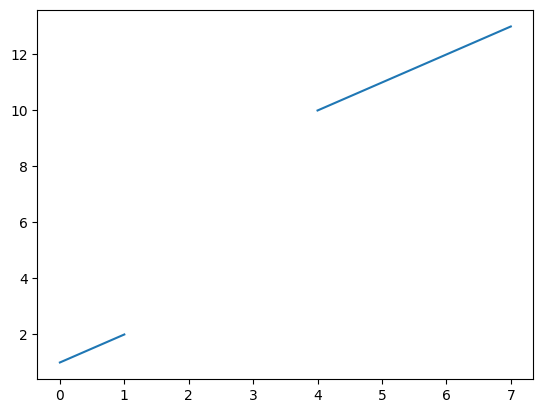

In [34]:
s.plot()

In [35]:
s.interpolate()

0     1.000000
1     2.000000
2     4.666667
3     7.333333
4    10.000000
5    11.000000
6    12.000000
7    13.000000
dtype: float64

<Axes: >

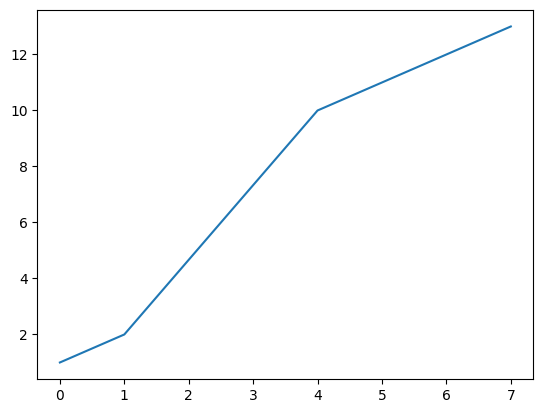

In [36]:
s.interpolate().plot()

In [28]:
s.interpolate(method='values')

0     1.000000
1     2.000000
2     4.666667
3     7.333333
4    10.000000
5    11.000000
6    12.000000
7    13.000000
dtype: float64

##### Series.isnna(), Series.isnull(), Series.notna(), Series.notnull()

In [40]:
s = pd.Series([1, np.nan, np.nan, pd.NaT, None, '', [], *range(10, 14)])
s

0        1
1      NaN
2      NaN
3      NaT
4     None
5         
6       []
7       10
8       11
9       12
10      13
dtype: object

In [43]:
s.isna()

0      True
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
dtype: bool

In [42]:
s.notna()

0      True
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
dtype: bool

##### Series.replace()

```python
Series.replace(to_replace=None, value=<no_default>, *, inplace=False, limit=None, regex=False, method=<no_default>)
```

In [55]:
s = pd.Series([1, np.nan, np.nan, pd.NaT, None, '', [1], *range(10, 14)])
s

0        1
1      NaN
2      NaN
3      NaT
4     None
5         
6      [1]
7       10
8       11
9       12
10      13
dtype: object

In [45]:
s.replace(np.nan, 0)

0      1
1      0
2      0
3      0
4      0
5       
6     []
7     10
8     11
9     12
10    13
dtype: object

In [53]:
s.replace(
    {
        np.nan: 0,
        '': 0,
        # []: 0, # ERRTypeError: unhashable type: 'list'
    }
)

0      1
1      0
2      0
3      0
4      0
5      0
6     []
7     10
8     11
9     12
10    13
dtype: object

In [56]:
s.replace([1], 0)

0        0
1      NaN
2      NaN
3      NaT
4     None
5         
6      [1]
7       10
8       11
9       12
10      13
dtype: object

#### Сортировка и Reshaping

|Функция|Описание|
|---|---|
|	Series.argsort([axis, kind, order, stable])	|	Возвращает целочисленные индексы, которые будут сортировать значения Series.	|
|	Series.argmin([axis, skipna])	|	Возвращает целочисленную позицию наименьшего значения в Series.	|
|	Series.argmax([axis, skipna])	|	Возвращает целочисленную позицию наибольшего значения в Series.	|
|	Series.reorder_levels(order)	|	Представляет уровни индекса, используя порядок ввода.	|
|	Series.swaplevel([i, j, copy])	|	Меняет местами уровни i и j в MultiIndex.	|
|	Series.sort_values(*[, axis, ascending, ...])	|	Сортирует по значениям.	|
|	Series.sort_index(*[, axis, level, ...])	|	Сортирует Series по меткам индекса.	|
|	Series.unstack([level, fill_value, sort])	|	Распаковывает, также известное как pivot, Series с MultiIndex для создания DataFrame.	|
|	Series.explode([ignore_index])	|	Преобразует каждый элемент списка в строку.	|
|	Series.searchsorted(value[, side, sorter])	|	Находит индексы, куда следует вставить элементы для сохранения порядка.	|
|	Series.repeat(repeats[, axis])	|	Повторяет элементы Series.	|
|	Series.squeeze([axis])	|	Сжимает объекты одномерной оси в скаляры.	|


##### Series.argsort()

```python
Series.argsort(axis=0, kind='quicksort', order=None, stable=None)

# kind: mergesort, quicksort, heapsort, stable
```

In [2]:
s = pd.Series([100, 3, -5, 6, 12, 12, 12])
s

0    100
1      3
2     -5
3      6
4     12
5     12
6     12
dtype: int64

In [3]:
s.argsort()

0    2
1    1
2    3
3    4
4    5
5    6
6    0
dtype: int64

##### Series.argmin() и Series.argmax()

```python
Series.argmin(axis=None, skipna=True, *args, **kwargs)
Series.argmax(axis=None, skipna=True, *args, **kwargs)
```

In [4]:
s = pd.Series([100, 3, -5, 6, 12, 12, 12])
s

0    100
1      3
2     -5
3      6
4     12
5     12
6     12
dtype: int64

In [5]:
s.argmin(), s.argmax()

(np.int64(2), np.int64(0))

In [6]:
type(s.argmax())

numpy.int64

In [7]:
type(s.idxmax())

int

##### Series.reorder_levels()

```python
Series.reorder_levels(order)
```

In [3]:
tuples = [
    ('кобра', 'тип 1'), 
    ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'),
    ('кабанчик', 'тип 2')
]

index = pd.MultiIndex.from_tuples(tuples)

s = pd.Series([1, 2, 3, 4], index=index)
s

кобра     тип 1    1
          тип 2    2
кабанчик  тип 1    3
          тип 2    4
dtype: int64

In [4]:
s.reorder_levels([1, 0])

тип 1  кобра       1
тип 2  кобра       2
тип 1  кабанчик    3
тип 2  кабанчик    4
dtype: int64

##### Series.swaplevel()

```python
Series.swaplevel(i=-2, j=-1, copy=None)
```

In [5]:
tuples = [
    ('кобра', 'тип 1'), 
    ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'),
    ('кабанчик', 'тип 2')
]

index = pd.MultiIndex.from_tuples(tuples)

s = pd.Series([1, 2, 3, 4], index=index)
s

кобра     тип 1    1
          тип 2    2
кабанчик  тип 1    3
          тип 2    4
dtype: int64

In [9]:
s.swaplevel(0, 1)

тип 1  кобра       1
тип 2  кобра       2
тип 1  кабанчик    3
тип 2  кабанчик    4
dtype: int64

##### Series.sort_values()

```python
Series.sort_values(
    *, 
    axis=0, 
    ascending=True, 
    inplace=False, 
    kind='quicksort', 
    na_position='last', 
    ignore_index=False, 
    key=None
)

kind: quicksort, mergesort, heapsort, stable
```

In [11]:
s = pd.Series([100, 3, -5, 6, 12, np.nan, np.nan, 12, 12])
s

0    100.0
1      3.0
2     -5.0
3      6.0
4     12.0
5      NaN
6      NaN
7     12.0
8     12.0
dtype: float64

In [14]:
s.sort_values(na_position='first', ascending=False)

5      NaN
6      NaN
0    100.0
4     12.0
7     12.0
8     12.0
3      6.0
1      3.0
2     -5.0
dtype: float64

In [15]:
s = pd.Series(['Пн', 'Вт', 'Ср', 'Пт', 'Пт', 'Сб', 'Сб'])
s

0    Пн
1    Вт
2    Ср
3    Пт
4    Пт
5    Сб
6    Сб
dtype: object

In [16]:
s.sort_values()

1    Вт
0    Пн
3    Пт
4    Пт
5    Сб
6    Сб
2    Ср
dtype: object

In [31]:
# def sort_for_last_symbol(word):
#     return word.upper()

In [32]:
# sort_for_last_symbol('Чт')

In [33]:
# s.sort_values(key=sort_for_last_symbol)

##### Series.sort_index()

```python
Series.sort_index(
    *, 
    axis=0, 
    level=None, 
    ascending=True, 
    inplace=False, 
    kind='quicksort', 
    na_position='last', 
    sort_remaining=True,  # Сортировать ли по оставшимся уровням
    ignore_index=False, 
    key=None
)
```

In [36]:
s = pd.Series([100, 3, -5, 6, 12, np.nan, np.nan, 12, 12], index=range(9,0, -1))
s

9    100.0
8      3.0
7     -5.0
6      6.0
5     12.0
4      NaN
3      NaN
2     12.0
1     12.0
dtype: float64

In [43]:
s.sort_index()

1     12.0
2     12.0
3      NaN
4      NaN
5     12.0
6      6.0
7     -5.0
8      3.0
9    100.0
dtype: float64

In [44]:
s.sort_index(ignore_index=True)

0     12.0
1     12.0
2      NaN
3      NaN
4     12.0
5      6.0
6     -5.0
7      3.0
8    100.0
dtype: float64

In [49]:
s.sort_index(ignore_index=True, ascending=False)

0    100.0
1      3.0
2     -5.0
3      6.0
4     12.0
5      NaN
6      NaN
7     12.0
8     12.0
dtype: float64

In [50]:
tuples = [
    ('кобра', 'тип 1'), 
    ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'),
    ('кабанчик', 'тип 2')
]

index = pd.MultiIndex.from_tuples(tuples)

s = pd.Series([1, 2, 3, 4], index=index)
s

кобра     тип 1    1
          тип 2    2
кабанчик  тип 1    3
          тип 2    4
dtype: int64

In [54]:
s.sort_index(level=1)

кабанчик  тип 1    3
кобра     тип 1    1
кабанчик  тип 2    4
кобра     тип 2    2
dtype: int64

In [55]:
s.sort_index(level=1, sort_remaining=False)

кобра     тип 1    1
кабанчик  тип 1    3
кобра     тип 2    2
кабанчик  тип 2    4
dtype: int64

##### Задание 2.022

1. Загрузите датасет data/titanic.csv.
2. Используйте метод `Series.argsort()`, чтобы получить индексы, которые впоследствии отсортируют датасет по столбцу Name по убыванию.
3. Используйте полученные индексы для сортировки датасета.

##### Задание 2.023

1. Создайте серию (Series) с произвольными числовыми значениями.
2. Используйте метод `Series.argmin()`, чтобы найти индекс минимального значения в серии.
3. Используйте метод `Series.argmax()`, чтобы найти индекс максимального значения в серии.
4. Выведите минимальное и максимальное значения, используя найденные индексы.
5. Создайте новую серию, в которой минимальное и максимальное значения будут заменены на их индексы.

##### Задание 2.024

1. Создайте серию (Series) с тремя уровнями индексов.
2. Используйте метод `Series.swaplevel()`, чтобы поменять местами два уровня индекса.
3. Используйте метод `Series.reorder_levels()`, чтобы задать новый порядок уровней индекса.
4. Выведите исходную серию и серии с измененными уровнями индекса.

##### Задание 2.025

1. Создайте серию (Series) с произвольными числовыми значениями и неупорядоченными индексами.
2. Используйте метод `Series.sort_values()`, чтобы отсортировать серию по значениям.
3. Используйте метод `Series.sort_index()`, чтобы отсортировать серию по индексам.
4. Выведите исходную серию и серии с отсортированными значениями и индексами.


Дополнительно:
1. Создайте серию с текстовыми значениями и примените методы `Series.sort_values()` и `Series.sort_index()`. Обратите внимание на порядок сортировки строк.
2. Попробуйте создать серию с датами и применить методы `Series.sort_values()` и `Series.sort_index()`. Обратите внимание на порядок сортировки дат.

##### Series.unstack()

```python
Series.unstack(level=-1, fill_value=None, sort=True)
```

In [3]:
tuples = [
    ('кобра', 'тип 1'), 
    ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'),
    ('кабанчик', 'тип 2')
]

index = pd.MultiIndex.from_tuples(tuples)

s = pd.Series([1, 2, 3, 4], index=index)
s

кобра     тип 1    1
          тип 2    2
кабанчик  тип 1    3
          тип 2    4
dtype: int64

In [4]:
s.unstack()

,тип 1,тип 2
кабанчик,3,4
кобра,1,2


In [5]:
s.unstack(level=0)

,кабанчик,кобра
тип 1,3,1
тип 2,4,2


In [6]:
s.unstack(level=0, sort=False)

,кобра,кабанчик
тип 1,1,2
тип 2,3,4


##### Series.explode()

```python
Series.explode(ignore_index=False)
```

In [8]:
s = pd.Series([[1,2,3], 'a', 'ab', 3, 4, np.nan, [10, 20, 33, [5, 7]]])
s

0               [1, 2, 3]
1                       a
2                      ab
3                       3
4                       4
5                     NaN
6    [10, 20, 33, [5, 7]]
dtype: object

In [9]:
s.explode()

0         1
0         2
0         3
1         a
2        ab
3         3
4         4
5       NaN
6        10
6        20
6        33
6    [5, 7]
dtype: object

In [11]:
s.explode(True).explode(True)

0       1
1       2
2       3
3       a
4      ab
5       3
6       4
7     NaN
8      10
9      20
10     33
11      5
12      7
dtype: object

##### Series.searchsorted()

```python
Series.searchsorted(value, side='left', sorter=None)
```

In [21]:
s = pd.Series([1, 2, 2, 4, 6, 7])
s

0    1
1    2
2    2
3    4
4    6
5    7
dtype: int64

In [22]:
s.searchsorted(2)

np.int64(1)

In [23]:
s.searchsorted(2, side='right')

np.int64(3)

In [27]:
s.searchsorted(3)

np.int64(3)

In [28]:
s.searchsorted([3, 5])

array([3, 4])

In [29]:
s = pd.Series(pd.to_datetime(['12/23/2024', '12/24/2024', '12/26/2024']))
s

0   2024-12-23
1   2024-12-24
2   2024-12-26
dtype: datetime64[ns]

In [30]:
s.searchsorted('12/25/2024')

np.int64(2)

In [38]:
s = pd.Series([2, 1, 3, 6, 5, 8])  # ВАЖНО перед применением метода проверить последовательность на монотонность
s

0    2
1    1
2    3
3    6
4    5
5    8
dtype: int64

In [37]:
s.searchsorted(1)

np.int64(0)

##### Series.repeat()

```python
Series.repeat(repeats, axis=None)
```

In [42]:
s = pd.Series([2, 1, 3, 6])
s

0    2
1    1
2    3
3    6
dtype: int64

In [43]:
s.repeat(2)

0    2
0    2
1    1
1    1
2    3
2    3
3    6
3    6
dtype: int64

In [44]:
s.repeat([3, 2, 1, 4])

0    2
0    2
0    2
1    1
1    1
2    3
3    6
3    6
3    6
3    6
dtype: int64

In [45]:
s = pd.Series(['ann', 'pet', 'den'])
s

0    ann
1    pet
2    den
dtype: object

In [46]:
s.repeat(3)

0    ann
0    ann
0    ann
1    pet
1    pet
1    pet
2    den
2    den
2    den
dtype: object

##### Series.squeeze()

```python
Series.squeeze(axis=None)
```

In [71]:
s = pd.Series([2, 2, 1, 6])
s

0    2
1    2
2    1
3    6
dtype: int64

In [72]:
s.squeeze()

0    2
1    2
2    1
3    6
dtype: int64

In [73]:
condition = s[s % 2 == 0]
condition

0    2
1    2
3    6
dtype: int64

In [74]:
condition.squeeze()

0    2
1    2
3    6
dtype: int64

In [75]:
condition = s[s % 2 == 1]
condition

2    1
dtype: int64

In [76]:
condition.squeeze()

np.int64(1)

In [65]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=['a', 'b'])
df

,a,b
0,1,2
1,3,4


In [77]:
df.squeeze()

,a,b
0,1,2
1,3,4


In [66]:
df_a = df[['a']]
df_a

,a
0,1
1,3


In [67]:
df_a.squeeze('columns')

0    1
1    3
Name: a, dtype: int64

In [68]:
df_0a = df.loc[df.index < 1, ['a']]
df_0a

,a
0,1


In [69]:
df_0a.squeeze('rows')

a    1
Name: 0, dtype: int64

In [70]:
df_0a.squeeze()

np.int64(1)

##### Задание 2.026

Ниже предоставлен набор данных о продажах товаров в различных магазинах. 

Каждый товар может продаваться в нескольких магазинах, а количество продаж для каждого товара и магазина представлено в виде списка.

```python
{
    'Товар': ['Товар 1', 'Товар 2', 'Товар 3'],
    'Магазины': [
        ['Магазин A', 'Магазин B'],
        ['Магазин B', 'Магазин C'],
        ['Магазин A']
    ],
    'Продажи': [
        [10, 20],  # Продажи Товара 1 в Магазине A и Магазине B
        [5, 15],   # Продажи Товара 2 в Магазине B и Магазине C
        [30]       # Продажи Товара 3 в Магазине A
    ]
}
```

1. **Используйте метод `Series.unstack`** для преобразования данных таким образом, чтобы каждый магазин стал отдельной колонкой, а в ячейках отображались продажи товаров в этих магазинах. Если данные не могут быть отображены в таблице напрямую, найдите способ адаптировать их.

2. **Примените метод `Series.explode`**, чтобы преобразовать список магазинов и продаж в отдельные строки, где каждый товар будет записан для каждого магазина отдельно с соответствующими продажами.

3. **Используйте метод `Series.searchsorted`** для нахождения позиции товара по количеству продаж. Для этого отсортируйте данные по продажам и найдите индекс позиции, на которой будет стоять определённое количество продаж (например, для товара 2 с продажами 15).

4. **Примените метод `Series.repeat`**, чтобы каждый товар повторялся несколько раз, например, 3 раза, а в каждой строке указаны разные магазины и соответствующие продажи.

5. **Используйте метод `Series.squeeze`**, чтобы избавиться от лишнего уровня индекса в таблице (если он есть), преобразовав данные в одномерный объект Series.

#### Объединение, сравнение, joing, merging

Series.compare() и Series.update()

##### Series.compare()

```python
Series.compare(other, align_axis=1, keep_shape=False, keep_equal=False, result_names=('self', 'other'))
```

In [12]:
s1 = pd.Series([1, 2, 3, np.nan, 6])
s2 = pd.Series([2, 3, 4, np.nan, 6])

In [13]:
s1

0    1.0
1    2.0
2    3.0
3    NaN
4    6.0
dtype: float64

In [14]:
s2

0    2.0
1    3.0
2    4.0
3    NaN
4    6.0
dtype: float64

In [15]:
s1.compare(s2)

,self,other
0,1.0,2.0
1,2.0,3.0
2,3.0,4.0


In [16]:
nb1 = pd.Series([50_000, 4, 1, np.nan, 30_000], index=['Цена', 'ОЗУ', 'HDD', 'Чипсет', 'Ёмкость аккумулятора'])
nb2 = pd.Series([51_000, 8, 1, np.nan, 30_000], index=['Цена', 'ОЗУ', 'HDD', 'Чипсет', 'Ёмкость аккумулятора'])

In [17]:
nb1

Цена                    50000.0
ОЗУ                         4.0
HDD                         1.0
Чипсет                      NaN
Ёмкость аккумулятора    30000.0
dtype: float64

In [18]:
nb2

Цена                    51000.0
ОЗУ                         8.0
HDD                         1.0
Чипсет                      NaN
Ёмкость аккумулятора    30000.0
dtype: float64

In [19]:
nb1.compare(nb2)

,self,other
Цена,50000.0,51000.0
ОЗУ,4.0,8.0


In [21]:
nb1.compare(nb2, align_axis=0)

Цена  self     50000.0
      other    51000.0
ОЗУ   self         4.0
      other        8.0
dtype: float64

In [22]:
nb1.compare(nb2, keep_shape=True)

,self,other
Цена,50000.0,51000.0
ОЗУ,4.0,8.0
HDD,NaN,NaN
Чипсет,NaN,NaN
Ёмкость аккумулятора,NaN,NaN


In [26]:
nb1.compare(nb2, keep_shape=True, keep_equal=True)

,self,other
Цена,50000.0,51000.0
ОЗУ,4.0,8.0
HDD,1.0,1.0
Чипсет,NaN,NaN
Ёмкость аккумулятора,30000.0,30000.0


##### Series.update()

```python
Series.update(other)
```

In [27]:
s = pd.Series(range(7))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [28]:
s.update(pd.Series(range(7,0,-1)))
s

0    7
1    6
2    5
3    4
4    3
5    2
6    1
dtype: int64

In [30]:
s.update(pd.Series([20, 30], index=[2, 0]))

In [32]:
pd.Series([20, 30], index=[2, 0])

2    20
0    30
dtype: int64

In [31]:
s

0    30
1     6
2    20
3     4
4     3
5     2
6     1
dtype: int64

In [33]:
s = pd.Series(range(7))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [34]:
s.update(pd.Series(range(10,0,-1)))
s

0    10
1     9
2     8
3     7
4     6
5     5
6     4
dtype: int64

In [35]:
pd.Series(range(10,0,-1))

0    10
1     9
2     8
3     7
4     6
5     5
6     4
7     3
8     2
9     1
dtype: int64

In [39]:
s = pd.Series(range(7))
s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

In [40]:
s.update(pd.Series([20, np.nan], index=[2, 0]))
s

0     0
1     1
2    20
3     3
4     4
5     5
6     6
dtype: int64

In [42]:
s.update(pd.Series({6: 123}))
s

0      0
1      1
2     20
3      3
4      4
5      5
6    123
dtype: int64

#### Методы связанные с Временными рядами

|Функция|Описание|
|---|---|
|	Series.asfreq(freq[, method, how, ...])	|	Преобразовывает временной ряд в указанную частоту.	|
|	Series.asof(where[, subset])	|	Возвращает последнюю строку(и) без NaN перед where.	|
|	Series.shift([periods, freq, axis, ...])	|	Смещает индекс на желаемое количество периодов с необязательной временной частотой.	|
|	Series.first_valid_index()	|	Возвращает индекс для первого значения non-NA или None, если не найдено значение non-NA.	|
|	Series.last_valid_index()	|	Возвращает индекс для последнего значения non-NA или None, если не найдено значение non-NA.	|
|	Series.resample(rule[, axis, closed, label, ...])	|	Выбирает повторно данные временного ряда.	|
|	Series.tz_convert(tz[, axis, level, copy])	|	Преобразовает ось tz-aware в целевой часовой пояс.	|
|	Series.tz_localize(tz[, axis, level, copy, ...])	|	Локализует индекс tz-naive Series или DataFrame в целевой часовой пояс.	|
|	Series.at_time(time[, asof, axis])	|	Выбирает значения в определенное время суток (например, 9:30 утра).	|
|	Series.between_time(start_time, end_time[, ...])	|	Выбирает значения между определенными временами суток (например, 9:00-9:30 утра).	|


##### Series.asfreq()

```python
Series.asfreq(freq, method=None, how=None, normalize=False, fill_value=None)
```

In [9]:
index = pd.date_range('1/1/2025', periods=7, freq='h')
s = pd.Series([3, 5, 3, np.nan, None, 1, 0], index=index)
df = pd.DataFrame({'s': s})
df

,s
2025-01-01 00:00:00,3.0
2025-01-01 01:00:00,5.0
2025-01-01 02:00:00,3.0
2025-01-01 03:00:00,NaN
2025-01-01 04:00:00,NaN
2025-01-01 05:00:00,1.0
2025-01-01 06:00:00,0.0


In [32]:
# df.asfreq(freq='7min')

In [ ]:
df.asfreq(freq='30min')

,s
2025-01-01 00:00:00,3.0
2025-01-01 00:30:00,NaN
2025-01-01 01:00:00,5.0
2025-01-01 01:30:00,NaN
2025-01-01 02:00:00,3.0
2025-01-01 02:30:00,NaN
2025-01-01 03:00:00,NaN
2025-01-01 03:30:00,NaN
2025-01-01 04:00:00,NaN
2025-01-01 04:30:00,NaN


In [15]:
df.asfreq(freq='30min', fill_value=-1)

,s
2025-01-01 00:00:00,3.0
2025-01-01 00:30:00,-1.0
2025-01-01 01:00:00,5.0
2025-01-01 01:30:00,-1.0
2025-01-01 02:00:00,3.0
2025-01-01 02:30:00,-1.0
2025-01-01 03:00:00,NaN
2025-01-01 03:30:00,-1.0
2025-01-01 04:00:00,NaN
2025-01-01 04:30:00,-1.0


In [18]:
df.asfreq(freq='30min', method='bfill')

,s
2025-01-01 00:00:00,3.0
2025-01-01 00:30:00,5.0
2025-01-01 01:00:00,5.0
2025-01-01 01:30:00,3.0
2025-01-01 02:00:00,3.0
2025-01-01 02:30:00,NaN
2025-01-01 03:00:00,NaN
2025-01-01 03:30:00,NaN
2025-01-01 04:00:00,NaN
2025-01-01 04:30:00,1.0


##### Series.asof()

```python
Series.asof(where, subset=None)
```

In [20]:
s = pd.Series([3, 4, np.nan, 1], index=[1, 2, 3, 4])
s

1    3.0
2    4.0
3    NaN
4    1.0
dtype: float64

In [25]:
s.asof(2)

np.float64(4.0)

In [40]:
s.asof([4, 50, 100])

4      1.0
50     1.0
100    1.0
dtype: float64

In [28]:
s.asof(1)

np.float64(3.0)

In [29]:
s.asof(0)

nan

In [43]:
df = pd.DataFrame(
    {
        'c1': [1, 2, 3, 4, 5],
        'c2': [10, np.nan, np.nan, 300, 400]
    },
    index=pd.date_range('1/1/2025', periods=5, freq='min')
)

df

,c1,c2
2025-01-01 00:00:00,1,10.0
2025-01-01 00:01:00,2,NaN
2025-01-01 00:02:00,3,NaN
2025-01-01 00:03:00,4,300.0
2025-01-01 00:04:00,5,400.0


In [44]:
df.asof(pd.DatetimeIndex(['2024-01-01 00:02:30', '2025-01-01 00:07:30']))

,c1,c2
2024-01-01 00:02:30,NaN,NaN
2025-01-01 00:07:30,5.0,400.0


##### Series.shift()

```python
Series.shift(periods=1, freq=None, axis=0, fill_value=<no_default>, suffix=None)
```

In [45]:
df = pd.DataFrame(
    {
        'c1': [1, 2, 3, 4, 5],
        'c2': [7, 8, 9, 10, 11],
        'c3': [13, 14, 15, 16, 17]
    },
    index=pd.date_range('1/1/2025', periods=5, freq='d')
)

df

,c1,c2,c3
2025-01-01,1,7,13
2025-01-02,2,8,14
2025-01-03,3,9,15
2025-01-04,4,10,16
2025-01-05,5,11,17


In [46]:
df.shift(axis=1)

,c1,c2,c3
2025-01-01,NaN,1,7
2025-01-02,NaN,2,8
2025-01-03,NaN,3,9
2025-01-04,NaN,4,10
2025-01-05,NaN,5,11


In [50]:
df.shift(periods=-1, axis=1)

,c1,c2,c3
2025-01-01,7,13,NaN
2025-01-02,8,14,NaN
2025-01-03,9,15,NaN
2025-01-04,10,16,NaN
2025-01-05,11,17,NaN


In [54]:
df.shift(periods=2, fill_value=0)

,c1,c2,c3
2025-01-01,0,0,0
2025-01-02,0,0,0
2025-01-03,1,7,13
2025-01-04,2,8,14
2025-01-05,3,9,15


In [57]:
df.shift(periods=2, freq='infer')

,c1,c2,c3
2025-01-03,1,7,13
2025-01-04,2,8,14
2025-01-05,3,9,15
2025-01-06,4,10,16
2025-01-07,5,11,17


In [ ]:
df.shift(periods=[0, 1, -1])

,c1_0,c2_0,c3_0,c1_1,c2_1,c3_1,c1_-1,c2_-1,c3_-1
2025-01-01,1,7,13,NaN,NaN,NaN,2.0,8.0,14.0
2025-01-02,2,8,14,1.0,7.0,13.0,3.0,9.0,15.0
2025-01-03,3,9,15,2.0,8.0,14.0,4.0,10.0,16.0
2025-01-04,4,10,16,3.0,9.0,15.0,5.0,11.0,17.0
2025-01-05,5,11,17,4.0,10.0,16.0,NaN,NaN,NaN


##### Series.first_valid_index() и Series.last_valid_index()

In [66]:
df = pd.DataFrame(
    {
        'c1': [1, 2, 3, 4, 5],
        'c2': [7, 8, 9, 10, 11],
        'c3': [13, 14, 15, 16, 17]
    },
    index=pd.date_range('1/1/2025', periods=5, freq='d')
)

df = df.shift(periods=[0, 3, -2])
df


,c1_0,c2_0,c3_0,c1_3,c2_3,c3_3,c1_-2,c2_-2,c3_-2
2025-01-01,1,7,13,NaN,NaN,NaN,3.0,9.0,15.0
2025-01-02,2,8,14,NaN,NaN,NaN,4.0,10.0,16.0
2025-01-03,3,9,15,NaN,NaN,NaN,5.0,11.0,17.0
2025-01-04,4,10,16,1.0,7.0,13.0,NaN,NaN,NaN
2025-01-05,5,11,17,2.0,8.0,14.0,NaN,NaN,NaN


In [67]:
df.c2_3.first_valid_index()

Timestamp('2025-01-04 00:00:00')

In [71]:
df['c3_-2'].last_valid_index()

Timestamp('2025-01-03 00:00:00')

# MultiIndex, Categorical, Scalar